In [2]:
#List of imports 
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import pandas as pd
import numpy as np
import math
import os
from collections import Counter
from itertools import groupby
from matplotlib import pyplot as plt
from matplotlib.font_manager import FontProperties
plt.rcParams.update({'figure.max_open_warning': 0})
import copy
import krippendorff

from sklearn.model_selection import StratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn import svm
from sklearn.metrics import accuracy_score, precision_score, make_scorer, f1_score, roc_auc_score, recall_score, precision_recall_curve, average_precision_score, plot_roc_curve, roc_curve, auc
from sklearn.metrics import confusion_matrix
from sklearn.metrics.ranking import _binary_clf_curve
from prg import prg

In [ ]:
#TO BE CHANGED, path to access the datasets
root_path = './Data/'

In [7]:
#Importing all of the datasets
filepaths = [root_path + 'pima.csv', root_path + 'yeast1.csv', root_path + 'new-thyroid1.csv', root_path + 'vehicle1.csv',
             root_path + 'page-blocks0.csv', root_path + 'cleveland-0_vs_4.csv', root_path + 'ecoli-0-4-6_vs_5.csv',
             root_path + 'led7digit-0-2-4-5-6-7-8-9_vs_1.csv', root_path + 'vowel0.csv', root_path + 'glass-0-1-4-6_vs_2.csv',
             root_path + 'yeast-1-2-8-9_vs_7.csv', root_path + 'poker-8-9_vs_5.csv', root_path + 'winequality-red-4.csv',
             root_path + 'poker-8-9_vs_6.csv', root_path + 'dermatology-6.csv']
numDatasets = len(filepaths)

dataArray = [None] * numDatasets
label_names = [['Preg', 'Plas', 'Pres', 'Skin', 'Insu', 'Mass', 'Pedi', 'Age', 'Class'],
               ['Mcg','Gvh','Alm', 'Mit', 'Erl', 'Pox', 'Vac', 'Nuc', 'Class'],
               ['T3resin', 'Thyroxin', 'Triiodothyronine', 'Thyroidstimulating', 'TSH_value', 'Class'],
               ['Compactness', 'Circularity', 'Distance_circularity', 'Radius_ratio', 'Praxis_aspect_ratio', 'Max_length_aspect_ratio', 'Scatter_ratio', 'Elongatedness', 'Praxis_rectangular', 'Length_rectangular', 'Major_variance', 'Minor_variance', 'Gyration_radius', 'Major_skewness', 'Minor_skewness', 'Minor_kurtosis', 'Major_kurtosis', 'Hollows_ratio', 'Class'],
               ['Height', 'Lenght', 'Area', 'Eccen', 'P_black', 'P_and', 'Mean_tr', 'Blackpix', 'Blackand', 'Wb_trans', 'Class'],
               ['age','sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal','Class'],
               ['a1','a2','a3','a5','a6','a7','Class'],
               ['Led1','Led2','Led3','Led4','Led5','Led6','Led7','Class'],
               ['TT', 'SpeakerNumber', 'Sex', 'F0', 'F1', 'F2', 'F3', 'F4', 'F5', 'F6', 'F7', 'F8', 'F9', 'Class'],
               ['RI','Na','Mg','Al','Si','K','Ca','Ba','Fe','Class'],
               ['Mcg', 'Gvh', 'Alm', 'Mit', 'Erl', 'Pox', 'Vac', 'Nuc', 'Class'],
               ['S1', 'C1', 'S2', 'C2', 'S3', 'C3', 'S4', 'C4', 'S5', 'C5', 'Class'],
               ['FixedAcidity', 'VolatileAcidity', 'CitricAcid', 'ResidualSugar', 'Chlorides', 'FreeSulfurDioxide', 'TotalSulfurDioxide', 'Density', 'PH', 'Sulphates', 'Alcohol','Class'],
               ['S1', 'C1', 'S2', 'C2', 'S3', 'C3', 'S4', 'C4', 'S5', 'C5', 'Class'],
               ['Erythema', 'Scaling', 'Definite_borders', 'Itching', 'Koebner_phenomenon', 'Polygonal_papules', 'Follicular_papules', 'Oral_mucosal', 'Knee_and_elbow', 'Scalp_involvement', 'Family_history', 'Melanin_incontinence', 'Eosinophils', 'PNL_infiltrate', 'Fibrosis', 'Exocytosis', 'Acanthosis', 'Hyperkeratosis', 'Parakeratosis', 'Clubbing', 'Elongation', 'Thinning', 'Spongiform_pustule', 'Munro_microabcess', 'Focal_hypergranulosis', 'Granular_layer', 'Vacuolisation', 'Spongiosis', 'Saw-tooth_appearance', 'Follicular_horn_plug', 'Perifollicular_parakeratosis', 'Inflammatory_monoluclear', 'Band-like_infiltrate', 'Age', 'Class']]

for i in range(numDatasets):
  dataArray[i] = pd.read_csv(filepaths[i], names=label_names[i], index_col=False)

X = [None] * numDatasets
y_data = [None] * numDatasets

#Data cleaning
for i in range(numDatasets):
  X[i] = dataArray[i].iloc[:,:-1]
  y_data[i] = dataArray[i].iloc[:,-1:]
  y_data[i]['Class'] = y_data[i]['Class'].str.strip()
  y_data[i].replace({'positive': 1, 'negative': 0}, inplace=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4389: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


In [9]:
#Printing the value counts of each datasets to demonstrate the imbalance
for x in range(numDatasets):
  print(y_data[x].value_counts())
  print("\n", y_data[x].value_counts(normalize=True))

Class
0        500
1        268
dtype: int64

 Class
0        0.651042
1        0.348958
dtype: float64
Class
0        1055
1         429
dtype: int64

 Class
0        0.710916
1        0.289084
dtype: float64
Class
0        180
1         35
dtype: int64

 Class
0        0.837209
1        0.162791
dtype: float64
Class
0        629
1        217
dtype: int64

 Class
0        0.743499
1        0.256501
dtype: float64
Class
0        4913
1         559
dtype: int64

 Class
0        0.897844
1        0.102156
dtype: float64
Class
0        160
1         13
dtype: int64

 Class
0        0.924855
1        0.075145
dtype: float64
Class
0        183
1         20
dtype: int64

 Class
0        0.901478
1        0.098522
dtype: float64
Class
0        406
1         37
dtype: int64

 Class
0        0.916479
1        0.083521
dtype: float64
Class
0        898
1         90
dtype: int64

 Class
0        0.908907
1        0.091093
dtype: float64
Class
0        188
1         17
dtype: int64

 Class
0      

In [10]:
#Variables definitions
sk = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

#Functions definitions
def truncate(number, digits) -> float:
    stepper = 10.0 ** digits
    return math.trunc(stepper * number) / stepper

def calcAvg(scores, decimals=3):
  avg = 0
  for score in scores:
    avg += score

  return truncate(avg/len(scores), decimals)

def gmean_score(y_true, y_pred):
  matrix = confusion_matrix(y_true, y_pred)
  TN = matrix[0][0]
  FN = matrix[1][0]
  TP = matrix[1][1]
  FP = matrix[0][1]

  return math.sqrt((TP/(TP+FN))*(TN/(TN+FP)))

def getPos(scores_list, cf, metric):
  return list(list(zip(*sorted(scores_list, key=lambda x: x[metric], reverse=True)))[0]).index(cf)+1

def getMode(ranks):
  freqs = groupby(Counter(ranks).most_common(), lambda x:x[1])
  modes = [val for val,count in next(freqs)[1]]
  return calcAvg(modes)

def getModeDiff(ranks):
  modeDiffs = []
  for i in range(len(ranks)):
    modeDiffs.append(abs(ranks[i]-getMode(ranks)))

  return modeDiffs

def rank(scores):
  scores_list = []

  for i in range(len(scores)):
    scores_list.append([scores[i]['classifier_name'],calcAvg(scores[i]['test_F1']),calcAvg(scores[i]['test_gmeans']),calcAvg(scores[i]['test_aucs']),
                        scores[i]['test_pr_auc'],scores[i]['test_pr_auc_manning'],scores[i]['test_pr_auc_ap'],scores[i]['test_prg_auc'],scores[i]['test_pr_auc_davis']])

  print('F1 ranking:')
  print(list(list(zip(*sorted(scores_list, key=lambda x: x[1], reverse=True)))[0]))
  print(list(list(zip(*sorted(scores_list, key=lambda x: x[1], reverse=True)))[1]),'\n')

  print('Gmean ranking:')
  print(list(list(zip(*sorted(scores_list, key=lambda x: x[2], reverse=True)))[0]))
  print(list(list(zip(*sorted(scores_list, key=lambda x: x[2], reverse=True)))[2]),'\n')

  print('ROC AUC ranking:')
  print(list(list(zip(*sorted(scores_list, key=lambda x: x[3], reverse=True)))[0]))
  print(list(list(zip(*sorted(scores_list, key=lambda x: x[3], reverse=True)))[3]),'\n')

  print('PR AUC ranking:')
  print(list(list(zip(*sorted(scores_list, key=lambda x: x[4], reverse=True)))[0]))
  print(list(list(zip(*sorted(scores_list, key=lambda x: x[4], reverse=True)))[4]),'\n')

  print('PR AUC Manning ranking:')
  print(list(list(zip(*sorted(scores_list, key=lambda x: x[5], reverse=True)))[0]))
  print(list(list(zip(*sorted(scores_list, key=lambda x: x[5], reverse=True)))[5]),'\n')

  print('Average precision score ranking:')
  print(list(list(zip(*sorted(scores_list, key=lambda x: x[6], reverse=True)))[0]))
  print(list(list(zip(*sorted(scores_list, key=lambda x: x[6], reverse=True)))[6]),'\n')

  print('PR-Gain AUC ranking:')
  print(list(list(zip(*sorted(scores_list, key=lambda x: x[7], reverse=True)))[0]))
  print(list(list(zip(*sorted(scores_list, key=lambda x: x[7], reverse=True)))[7]),'\n')

  print('PR AUC Davis ranking:')
  print(list(list(zip(*sorted(scores_list, key=lambda x: x[8], reverse=True)))[0]))
  print(list(list(zip(*sorted(scores_list, key=lambda x: x[8], reverse=True)))[8]),'\n')

  return

def rankScores(scores):
  scores_list_top = []

  for i in range(len(scores)):
    scores_list = []
    for j in range(len(scores[i])):
      scores_list.append([scores[i][j]['classifier_name'],calcAvg(scores[i][j]['test_F1']),calcAvg(scores[i][j]['test_gmeans']),
                          calcAvg(scores[i][j]['test_aucs']),scores[i][j]['test_pr_auc'],scores[i][j]['test_pr_auc_manning'],
                          scores[i][j]['test_pr_auc_ap'],scores[i][j]['test_prg_auc'],scores[i][j]['test_pr_auc_davis']])
    scores_list_top.append(scores_list)

  dt = []
  rf = []
  xgb = []
  svc = []

  for i in range(numDatasets):
    dt.append([getPos(scores_list_top[i], 'DecisionTreeClassifier', 1),getPos(scores_list_top[i], 'DecisionTreeClassifier', 2),getPos(scores_list_top[i], 'DecisionTreeClassifier', 3),
                   getPos(scores_list_top[i], 'DecisionTreeClassifier', 4),getPos(scores_list_top[i], 'DecisionTreeClassifier', 5),getPos(scores_list_top[i], 'DecisionTreeClassifier', 6),
                   getPos(scores_list_top[i], 'DecisionTreeClassifier', 7),getPos(scores_list_top[i], 'DecisionTreeClassifier', 8)])
    rf.append([getPos(scores_list_top[i], 'RandomForestClassifier', 1),getPos(scores_list_top[i], 'RandomForestClassifier', 2),getPos(scores_list_top[i], 'RandomForestClassifier', 3),
                   getPos(scores_list_top[i], 'RandomForestClassifier', 4),getPos(scores_list_top[i], 'RandomForestClassifier', 5),getPos(scores_list_top[i], 'RandomForestClassifier', 6),
                   getPos(scores_list_top[i], 'RandomForestClassifier', 7),getPos(scores_list_top[i], 'RandomForestClassifier', 8)])
    xgb.append([getPos(scores_list_top[i], 'XGBClassifier', 1),getPos(scores_list_top[i], 'XGBClassifier', 2),getPos(scores_list_top[i], 'XGBClassifier', 3),
                   getPos(scores_list_top[i], 'XGBClassifier', 4),getPos(scores_list_top[i], 'XGBClassifier', 5),getPos(scores_list_top[i], 'XGBClassifier', 6),
                   getPos(scores_list_top[i], 'XGBClassifier', 7),getPos(scores_list_top[i], 'XGBClassifier', 8)])
    svc.append([getPos(scores_list_top[i], 'SVC', 1),getPos(scores_list_top[i], 'SVC', 2),getPos(scores_list_top[i], 'SVC', 3),
                   getPos(scores_list_top[i], 'SVC', 4),getPos(scores_list_top[i], 'SVC', 5),getPos(scores_list_top[i], 'SVC', 6),
                   getPos(scores_list_top[i], 'SVC', 7),getPos(scores_list_top[i], 'SVC', 8)])
    
  
  ranks = [dt, rf, xgb, svc]
  return ranks

def printRanks(ranks):
  fig, ax = plt.subplots()
  # hide axes
  fig.patch.set_visible(False)
  ax.axis('off')
  ax.axis('tight')


  df = pd.DataFrame(np.random.randn(135, 6), columns=['Datasets','Metric','DT','RF','XGB','SVC'])

  dataset_col = []
  metric_col = []
  dt_col = []
  rf_col = []
  xgb_col = []
  svc_col = []

  for i in range(numDatasets):
    dataset_col.extend([os.path.basename(os.path.normpath(filepaths[i])),'','','','','','','',''])
    metric_col.extend(['Metric','F1','GMean','ROC AUC','PR AUC','PR AUC Manning','Average Precision','PR_Gain AUC','PR AUC Davis'])
    dt_col.append('DT')
    dt_col.extend(ranks[0][i])
    rf_col.append('RF')
    rf_col.extend(ranks[1][i])
    xgb_col.append('XGB')
    xgb_col.extend(ranks[2][i])
    svc_col.append('SVC')
    svc_col.extend(ranks[3][i])

  df['Datasets'] = dataset_col
  df['Metric'] = metric_col
  df['DT'] = dt_col
  df['RF'] = rf_col
  df['XGB'] = xgb_col
  df['SVC'] = svc_col
    
  table = ax.table(cellText=df.values, colLabels=['Datasets','','','','',''], loc='center', cellLoc='center')
  table.auto_set_font_size(True)
  table.scale(4, 4)

  #Bold
  for (row, col), cell in table.get_celld().items():
    if ((row-1)%9 == 0):
        cell.set_text_props(fontproperties=FontProperties(weight='bold'))

  fig.tight_layout()
  plt.show()
  return

def printSD(ranks):
  fig, ax = plt.subplots()
  # hide axes
  fig.patch.set_visible(False)
  ax.axis('off')

  df = pd.DataFrame(np.random.randn(30, 6), columns=['Datasets','Metric','DT','RF','XGB','SVC'])

  dataset_col = []
  metric_col = []
  dt_col = []
  rf_col = []
  xgb_col = []
  svc_col = []

  for i in range(numDatasets):
    dataset_col.extend([os.path.basename(os.path.normpath(filepaths[i])),''])
    metric_col.extend(['Metric','Standard Deviation'])
    dt_col.append('DT')
    dt_col.append(np.std(ranks[0][i]))
    rf_col.append('RF')
    rf_col.append(np.std(ranks[1][i]))
    xgb_col.append('XGB')
    xgb_col.append(np.std(ranks[2][i]))
    svc_col.append('SVC')
    svc_col.append(np.std(ranks[3][i]))

  df['Datasets'] = dataset_col
  df['Metric'] = metric_col
  df['DT'] = dt_col
  df['RF'] = rf_col
  df['XGB'] = xgb_col
  df['SVC'] = svc_col

  table = ax.table(cellText=df.values, colLabels=['Datasets','','','','',''], loc='center', cellLoc='center')
  table.auto_set_font_size(True)
  table.scale(4, 4)

  #Bold
  for (row, col), cell in table.get_celld().items():
    if ((row-1)%2 == 0):
        cell.set_text_props(fontproperties=FontProperties(weight='bold'))

  fig.tight_layout()
  plt.show()
  return

def printMode(ranks, allData=True, metrics=['F1','GMean','ROCAUC','PRAUC','PRAUCManning','AP','PRGAINAUC','PRAUCDavis']):
  fig, ax = plt.subplots()
  # hide axes
  fig.patch.set_visible(False)
  ax.axis('off')
  new_ranks = copy.deepcopy(ranks)

  dataset_col = []
  metric_col = []
  dt_col = []
  rf_col = []
  xgb_col = []
  svc_col = []
  mode_col = []
  modes = []

  new_metrics = ['Metric','F1 (Mode Diff)','GMean (Mode Diff)','ROC AUC (Mode Diff)','PR AUC (Mode Diff)','PR AUC Manning (Mode Diff)','Average Precision (Mode Diff)','PR_Gain AUC (Mode Diff)','PR AUC Davis (Mode Diff)']

  if 'F1' not in metrics:
    del new_metrics[-8]
  if 'GMean' not in metrics:
    del new_metrics[-7]
  if 'ROCAUC' not in metrics:
    del new_metrics[-6]
  if 'PRAUC' not in metrics:
    del new_metrics[-5]
  if 'PRAUCManning' not in metrics:
    del new_metrics[-4]
  if 'AP' not in metrics:
    del new_metrics[-3]
  if 'PRGAINAUC' not in metrics:
    del new_metrics[-2]
  if 'PRAUCDavis' not in metrics:
    del new_metrics[-1]

  for i in range(numDatasets):
    for j in range(4):
      if 'F1' not in metrics:
        del new_ranks[j][i][-8]
      if 'GMean' not in metrics:
        del new_ranks[j][i][-7]
      if 'ROCAUC' not in metrics:
        del new_ranks[j][i][-6]
      if 'PRAUC' not in metrics:
        del new_ranks[j][i][-5]
      if 'PRAUCManning' not in metrics:
        del new_ranks[j][i][-4]
      if 'AP' not in metrics:
        del new_ranks[j][i][-3]
      if 'PRGAINAUC' not in metrics:
        del new_ranks[j][i][-2]
      if 'PRAUCDavis' not in metrics:
        del new_ranks[j][i][-1]

    l = [''] * len(metrics)
    dataset_col.extend([os.path.basename(os.path.normpath(filepaths[i]))])
    dataset_col.extend(l)
    metric_col.extend(new_metrics)
    dt_col.append('DT')
    dt_mode = getModeDiff(new_ranks[0][i])
    dt_col.extend(dt_mode)
    rf_col.append('RF')
    rf_mode = getModeDiff(new_ranks[1][i])
    rf_col.extend(rf_mode)
    xgb_col.append('XGB')
    xgb_mode = getModeDiff(new_ranks[2][i])
    xgb_col.extend(xgb_mode)
    svc_col.append('SVC')
    svc_mode = getModeDiff(new_ranks[3][i])
    svc_col.extend(svc_mode)
    mode_col.append('Mode Diff Avg')

    mode_avg = []
    for j in range(len(dt_mode)):
      mode_avg.append(calcAvg([dt_mode[j], rf_mode[j], xgb_mode[j], svc_mode[j]]))
    mode_col.extend(mode_avg)
    modes.append(mode_avg)
  
  if allData:
    df = pd.DataFrame(np.random.randn((len(metrics)+1)*numDatasets, 7), columns=['Datasets','Metric','DT','RF','XGB','SVC','Mode Diff Avg'])
    
    df['Datasets'] = dataset_col
    df['Metric'] = metric_col
    df['DT'] = dt_col
    df['RF'] = rf_col
    df['XGB'] = xgb_col
    df['SVC'] = svc_col
    df['Mode Diff Avg'] = mode_col
    table = ax.table(cellText=df.values, colLabels=['Datasets','','','','','',''], loc='center', cellLoc='center')
    table.scale(5, 5)
  else:
    df = pd.DataFrame(np.random.randn((len(metrics)+1)*numDatasets, 3), columns=['Datasets','Metric','Mode Diff Avg'])
    
    df['Datasets'] = dataset_col
    df['Metric'] = metric_col
    df['Mode Diff Avg'] = mode_col
    table = ax.table(cellText=df.values, colLabels=['Datasets','',''], loc='center', cellLoc='center')
    table.scale(3, 3)
  
  table.auto_set_font_size(True)

  #Bold
  for (row, col), cell in table.get_celld().items():
    if ((row-1)%(len(metrics)+1) == 0):
        cell.set_text_props(fontproperties=FontProperties(weight='bold'))

  fig.tight_layout()
  plt.show()
  return modes, new_metrics

def printModeAvg(modes, metric_col):
  fig, ax = plt.subplots()
  # hide axes
  fig.patch.set_visible(False)
  ax.axis('off')

  dataset_col = []
  metric_col_new = []
  mode_col = []

  l = [''] * len(modes[0])
  dataset_col.extend(['Imbalance Ratio < 9'])
  dataset_col.extend(l)
  dataset_col.extend(['9 < Imbalance Ratio < 13'])
  dataset_col.extend(l)
  dataset_col.extend(['16.9 < Imbalance Ratio'])
  dataset_col.extend(l)

  for i in range(3):

    metric_col_new.extend(metric_col)
    mode_col.append('Mode Diff Avg')

    modes_avg = []
    for j in range(len(modes[0])):
      modes_avg.append(calcAvg([modes[i*5][j],modes[(i*5)+1][j],modes[(i*5)+2][j],modes[(i*5)+3][j],modes[(i*5)+4][j]]))
    mode_col.extend(modes_avg)

  df = pd.DataFrame(np.random.randn((len(modes[0])+1)*3, 3), columns=['Datasets','Metric','Mode Diff Avg'])
  df['Datasets'] = dataset_col
  df['Metric'] = metric_col_new
  df['Mode Diff Avg'] = mode_col

  table = ax.table(cellText=df.values, colLabels=['Datasets','',''], loc='center', cellLoc='center')
  table.scale(3, 3)
  
  table.auto_set_font_size(True)

  #Bold
  for (row, col), cell in table.get_celld().items():
    if ((row-1)%(len(metric_col)) == 0):
        cell.set_text_props(fontproperties=FontProperties(weight='bold'))

  fig.tight_layout()
  plt.show()
  return

def printKrippendorff(ranks, metrics=['F1','GMean','ROCAUC','PRAUC','PRAUCManning','AP','PRGAINAUC','PRAUCDavis']):
  fig, ax = plt.subplots()
  # hide axes
  fig.patch.set_visible(False)
  ax.axis('off')

  dataset_col = []
  metric_col = []

  new_ranks = copy.deepcopy(ranks)

  for i in range(numDatasets):
    for j in range(4):
      if 'F1' not in metrics:
        del new_ranks[j][i][-8]
      if 'GMean' not in metrics:
        del new_ranks[j][i][-7]
      if 'ROCAUC' not in metrics:
        del new_ranks[j][i][-6]
      if 'PRAUC' not in metrics:
        del new_ranks[j][i][-5]
      if 'PRAUCManning' not in metrics:
        del new_ranks[j][i][-4]
      if 'AP' not in metrics:
        del new_ranks[j][i][-3]
      if 'PRGAINAUC' not in metrics:
        del new_ranks[j][i][-2]
      if 'PRAUCDavis' not in metrics:
        del new_ranks[j][i][-1]

  for i in range(numDatasets):
    krippendorff_ranks = []
    krippendorff_ranks.append(new_ranks[0][i])
    krippendorff_ranks.append(new_ranks[1][i])
    krippendorff_ranks.append(new_ranks[2][i])
    krippendorff_ranks.append(new_ranks[3][i])
    krippendorff_ranks = np.transpose(krippendorff_ranks)

    dataset_col.extend([os.path.basename(os.path.normpath(filepaths[i])),''])
    metric_col.extend(['Krippendorff Alpha', krippendorff.alpha(reliability_data=krippendorff_ranks, level_of_measurement='ordinal')])

  df = pd.DataFrame(np.random.randn(30, 2), columns=['Datasets','Metric'])
    
  df['Datasets'] = dataset_col
  df['Metric'] = metric_col
  table = ax.table(cellText=df.values, colLabels=['Datasets',''], loc='center', cellLoc='center')
  table.scale(3, 3)
  
  table.auto_set_font_size(True)

  #Bold
  for (row, col), cell in table.get_celld().items():
    if ((row-1)%2 == 0):
        cell.set_text_props(fontproperties=FontProperties(weight='bold'))

  fig.tight_layout()
  plt.show()

  return

def printScoresAvg(scores):
  fig, ax = plt.subplots()
  # hide axes
  fig.patch.set_visible(False)
  ax.axis('off')

  dataset_col = []
  metric_col = []
  dt_col = []
  rf_col = []
  xgb_col = []
  svc_col = []

  scores_list_top = []

  l = [''] * 8
  dataset_col.extend(['Imbalance Ratio < 9'])
  dataset_col.extend(l)
  dataset_col.extend(['9 < Imbalance Ratio < 13'])
  dataset_col.extend(l)
  dataset_col.extend(['16.9 < Imbalance Ratio'])
  dataset_col.extend(l)

  for i in range(len(scores)):
    scores_list = []
    for j in range(len(scores[i])):
      scores_list.append([scores[i][j]['classifier_name'],calcAvg(scores[i][j]['test_F1']),calcAvg(scores[i][j]['test_gmeans']),
                          calcAvg(scores[i][j]['test_aucs']),scores[i][j]['test_pr_auc'],scores[i][j]['test_pr_auc_manning'],
                          scores[i][j]['test_pr_auc_ap'],scores[i][j]['test_prg_auc'],scores[i][j]['test_pr_auc_davis']])
    scores_list_top.append(scores_list)

  scores_avg = []

  for k in range(3):
    metric_col.extend(['Metric','F1','GMean','ROC AUC','PR AUC','PR AUC Manning','AP','PR-GAIN AUC','PR AUC Davis'])
    dt_col.append('DT')
    rf_col.append('RF')
    xgb_col.append('XGB')
    svc_col.append('SVC')

    temp = []
    for i in range(len(scores_list_top[0])):
      classifier = []
      for j in range(1,len(scores_list_top[0][0])):
        classifier.append(calcAvg([scores_list_top[k*5][i][j],scores_list_top[(k*5)+1][i][j],scores_list_top[(k*5)+2][i][j],scores_list_top[(k*5)+3][i][j],scores_list_top[(k*5)+4][i][j]]))
      temp.append(classifier)
    
    dt_col.extend(temp[0])
    rf_col.extend(temp[1])
    xgb_col.extend(temp[2])
    svc_col.extend(temp[3])

  df = pd.DataFrame(np.random.randn(27, 6), columns=['Datasets','Metric','DT','RF','XGB','SVC'])
  df['Datasets'] = dataset_col
  df['Metric'] = metric_col
  df['DT'] = dt_col
  df['RF'] = rf_col
  df['XGB'] = xgb_col
  df['SVC'] = svc_col

  table = ax.table(cellText=df.values, colLabels=['Datasets','','','','',''], loc='center', cellLoc='center')
  table.scale(3, 3)
  
  table.auto_set_font_size(True)

  #Bold
  for (row, col), cell in table.get_celld().items():
    if ((row-1)%9 == 0):
        cell.set_text_props(fontproperties=FontProperties(weight='bold'))

  fig.tight_layout()
  plt.show()

  return


In [11]:
def crossValidate(cv_p, cf_p, X_p, y_p, num,rs_p=None, printGraph=False):
  #Precision-recall: https://stackoverflow.com/questions/29656550/how-to-plot-pr-curve-over-10-folds-of-cross-validation-in-scikit-learn?rq=1
  cv = cv_p
  classifier = cf_p

  accuracies = []
  F1s = []
  recalls = []
  gmeans = []
  aucs = []


  #Arrays for precision-recall curve computation
  y_probabilities = []
  y_real = []
  if printGraph:
    f, axes = plt.subplots(1, 2, figsize=(10, 5))


  for fold, (train_index,test_index) in enumerate(cv.split(X_p,y_p)):
    X_train_fold, y_train_fold = X_p.iloc[train_index], y_p.iloc[train_index]
    X_test_fold, y_test_fold = X_p.iloc[test_index], y_p.iloc[test_index]

    #Pre-processing happening after split
    if rs_p != None:
      X_train_fold_new, y_train_fold_new = rs_p.fit_resample(X_train_fold, y_train_fold)
    else:
      X_train_fold_new, y_train_fold_new = X_train_fold, y_train_fold


    classifier = classifier.fit(X_train_fold_new, np.ravel(y_train_fold_new))
    
    #Predictions
    pred = classifier.predict(X_test_fold)
    pred_proba = classifier.predict_proba(X_test_fold)

    #Precision-recall curve
    #Print curve for every fold
    #if printGraph:
      #precision, recall, _ = precision_recall_curve(y_test_fold, pred_proba[:,1])
      #lab = 'Fold %d AUC=%.4f' % (i+1, auc(recall, precision))
      #axes[0].step(recall, precision, label=lab) 
      

    y_real.append(y_test_fold) #Storing the real y values for calculating the precision-recall curve
    y_probabilities.append(pred_proba[:,1]) #Storing the predictions probabilities for calculating the precision-recall curve
    

    #Scores
    accuracies.append(accuracy_score(y_true=y_test_fold, y_pred=pred))
    F1s.append(f1_score(y_true=y_test_fold, y_pred=pred))
    recalls.append(recall_score(y_true=y_test_fold, y_pred=pred))
    gmeans.append(gmean_score(y_true=y_test_fold, y_pred=pred))
    aucs.append(roc_auc_score(y_true=y_test_fold, y_score=pred_proba[:,1], average=None))

  #Precision-recall graph and AUCs
  y_real = np.concatenate(y_real)
  y_probabilities = np.concatenate(y_probabilities)
  precision, recall, _ = precision_recall_curve(y_real, y_probabilities)
  pr_auc = auc(recall, precision)
  pr_auc_ap = average_precision_score(y_real, y_probabilities) #Average precision score, see https://scikit-learn.org/stable/modules/generated/sklearn.metrics.average_precision_score.html#sklearn.metrics.average_precision_score
  lab = 'Overall AUC=%.4f' % (pr_auc)

  #Precision-Recall-Gain curve
  prg_curve = prg.create_prg_curve(y_real, y_probabilities)
  prg_auc = prg.calc_auprg(prg_curve)
  lab_prg = 'Overall AUC=%.4f' % (prg_auc)

  #Davis interpolation
  fps, tps, thresholds = _binary_clf_curve(y_real, y_probabilities,
                                             pos_label=None,
                                             sample_weight=None)

  #Interpolate new TPs and FPs when diff between successive TP is >1
  for i in range(len(tps)-1):
    if (tps[i+1] - tps[i]) >= 2:
      local_skew = (fps[i+1]-fps[i])/(tps[i+1]-tps[i])
      
      for x in range(1,int(tps[i+1] - tps[i])):
        new_fp = fps[i]+(local_skew*x)
        tps = np.insert(tps, i+x, tps[i]+x)
        fps = np.insert(fps, i+x, new_fp)


  precision_davis = tps / (tps + fps)
  precision_davis[np.isnan(precision_davis)] = 0
  recall_davis = tps / tps[-1]
      
  # Stop when full recall is attained
  # and reverse the outputs so recall is decreasing
  last_ind = tps.searchsorted(tps[-1])
  sl = slice(last_ind, None, -1)

  precision_davis = np.r_[precision_davis[sl], 1]
  recall_davis = np.r_[recall_davis[sl], 0]
  pr_auc_davis = auc(recall_davis, precision_davis)

  #Manning interpolation
  #https://stackoverflow.com/questions/39836953/how-to-draw-a-precision-recall-curve-with-interpolation-in-python
  precision_manning = copy.deepcopy(precision)
  recall_manning = copy.deepcopy(recall)
  prInv = np.fliplr([precision_manning])[0]
  recInv = np.fliplr([recall_manning])[0]
  j = recall_manning.shape[0]-2

  while j>=0:
    if prInv[j+1]>prInv[j]:
        prInv[j]=prInv[j+1]
    j=j-1

  decreasing_max_precision = np.maximum.accumulate(prInv[::-1])[::-1]
  pr_auc_manning = auc(recInv, decreasing_max_precision)

  if printGraph:
    axes[0].grid(b=True)
    axes[0].step(recall, precision, label=lab, lw=2, color='black')
    axes[0].step(recall_davis, precision_davis, label='Davis interpolation AUC=%.4f' % (pr_auc_davis), lw=2, color='red') #Davis interpolation
    axes[0].step(recInv, decreasing_max_precision, label='Manning interpolation AUC=%.4f' % (pr_auc_manning), lw=2, color='fuchsia') #Manning interpolation
    axes[0].set_xlabel('Recall')
    axes[0].set_ylabel('Precision')
    axes[0].legend(loc='lower left', fontsize='small')

    #Plot the PRG curve
    pg = prg_curve['precision_gain']
    rg = prg_curve['recall_gain']
    
    axes[1].set_xticks(np.arange(0,1.25,0.25))
    axes[1].set_yticks(np.arange(0,1.25,0.25))
    axes[1].grid(b=True)
    axes[1].set_xlim((-0.05,1.02))
    axes[1].set_ylim((-0.05,1.02))
    axes[1].set_aspect('equal')

    indices = np.arange(np.argmax(prg_curve['in_unit_square']) - 1, len(prg_curve['in_unit_square']))
    axes[1].step(rg[indices], pg[indices], label=lab_prg, lw=2, color='blue')
    
    axes[1].set_xlabel('Recall Gain')
    axes[1].set_ylabel('Precision Gain')
    axes[1].legend(loc='lower left', fontsize='small')

    title = filepaths[num] + ' ' + classifier.__class__.__name__
    f.suptitle(title)
    f.tight_layout()
    f.show()

  return {'classifier_name': classifier.__class__.__name__,
          'test_acc': accuracies,
          'test_F1': F1s,
          'test_recall': recalls,
          'test_gmeans': gmeans,
          'test_aucs': aucs,
          'test_pr_auc': pr_auc,
          'test_pr_auc_ap': pr_auc_ap,
          'test_pr_auc_manning': pr_auc_manning,
          'test_prg_auc': prg_auc,
          'test_pr_auc_davis': pr_auc_davis}

Dataset: drive/My Drive/GradSchool/Master/Datasets/precisionRecall/pima.csv
Dataset: drive/My Drive/GradSchool/Master/Datasets/precisionRecall/yeast1.csv
Dataset: drive/My Drive/GradSchool/Master/Datasets/precisionRecall/new-thyroid1.csv
Dataset: drive/My Drive/GradSchool/Master/Datasets/precisionRecall/vehicle1.csv
Dataset: drive/My Drive/GradSchool/Master/Datasets/precisionRecall/page-blocks0.csv
Dataset: drive/My Drive/GradSchool/Master/Datasets/precisionRecall/cleveland-0_vs_4.csv
Dataset: drive/My Drive/GradSchool/Master/Datasets/precisionRecall/ecoli-0-4-6_vs_5.csv
Dataset: drive/My Drive/GradSchool/Master/Datasets/precisionRecall/led7digit-0-2-4-5-6-7-8-9_vs_1.csv
Dataset: drive/My Drive/GradSchool/Master/Datasets/precisionRecall/vowel0.csv
Dataset: drive/My Drive/GradSchool/Master/Datasets/precisionRecall/glass-0-1-4-6_vs_2.csv
Dataset: drive/My Drive/GradSchool/Master/Datasets/precisionRecall/yeast-1-2-8-9_vs_7.csv
Dataset: drive/My Drive/GradSchool/Master/Datasets/precisionRe

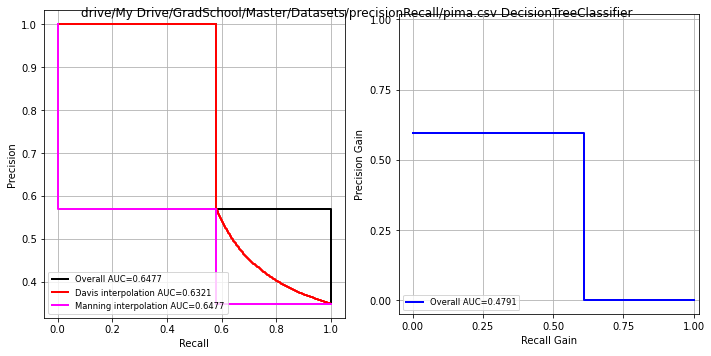

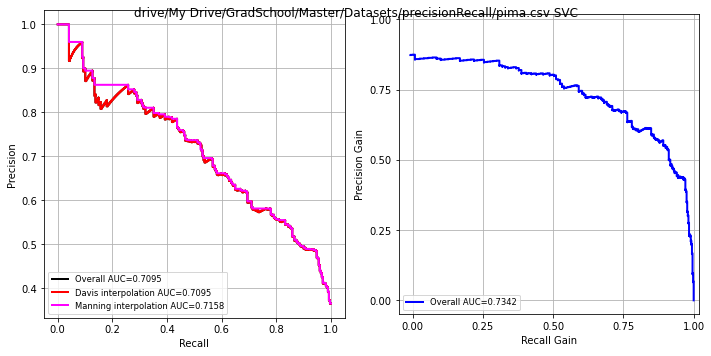

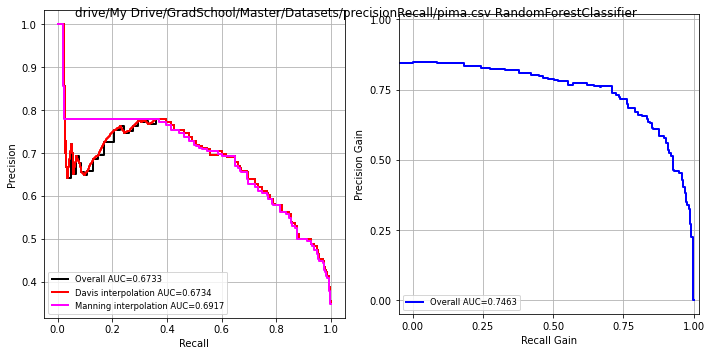

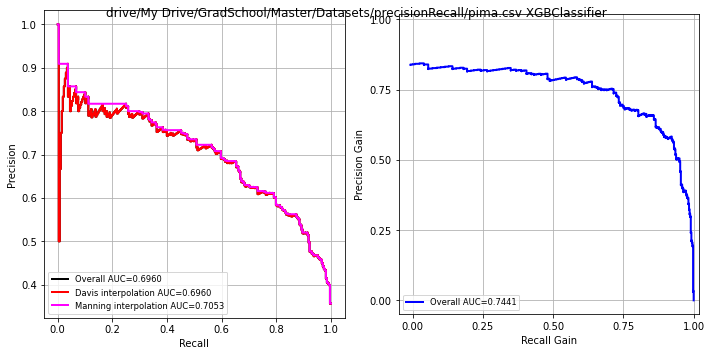

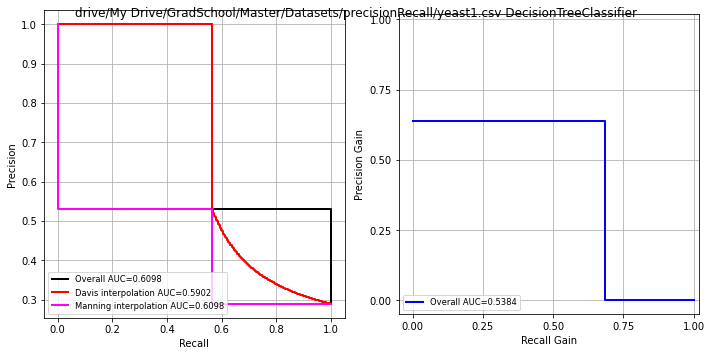

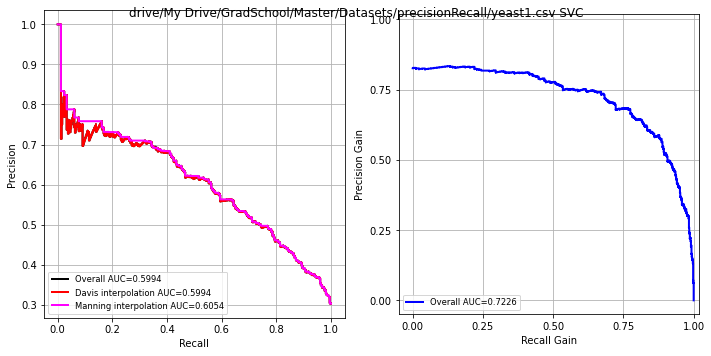

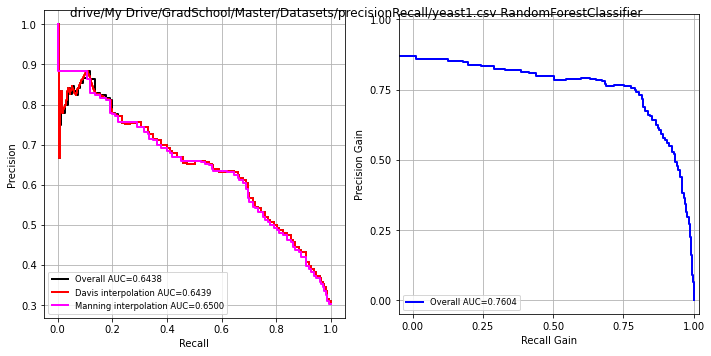

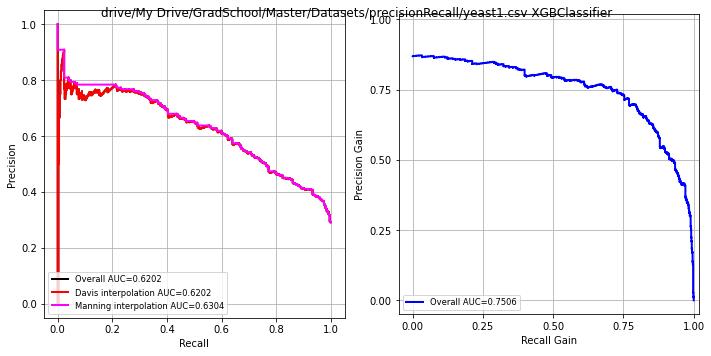

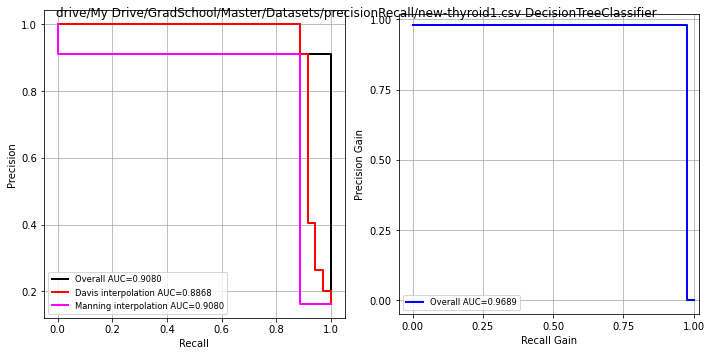

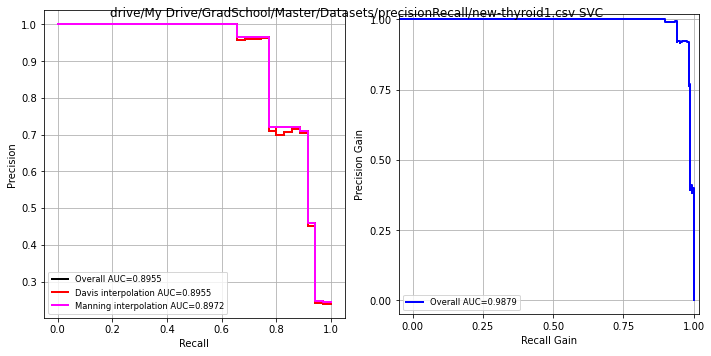

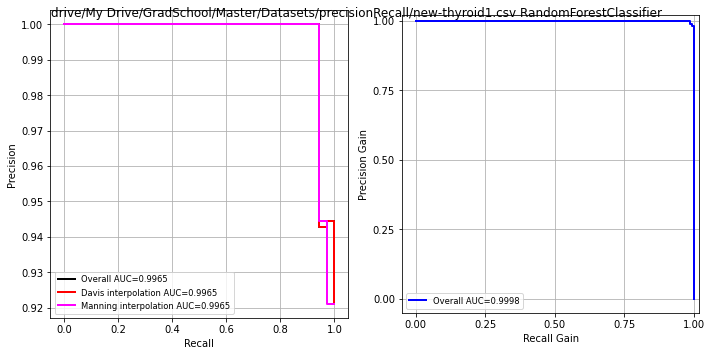

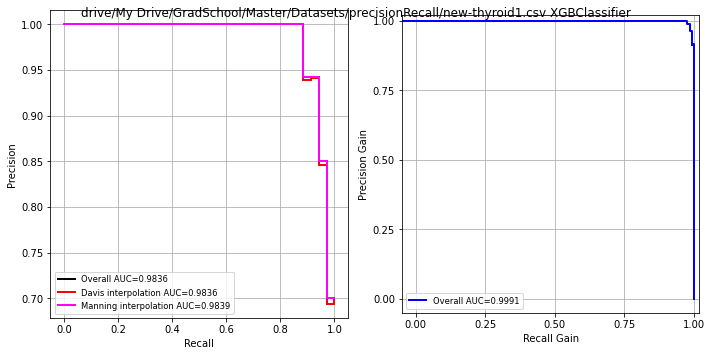

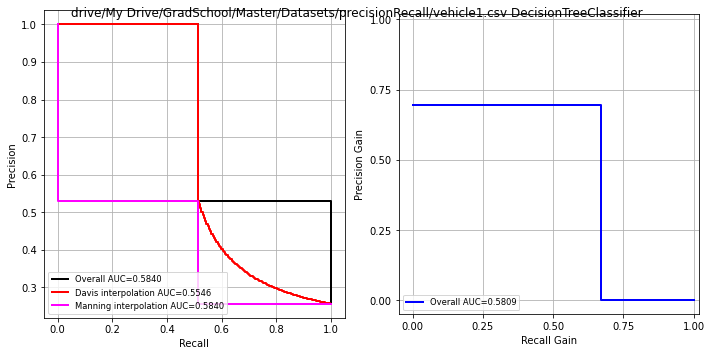

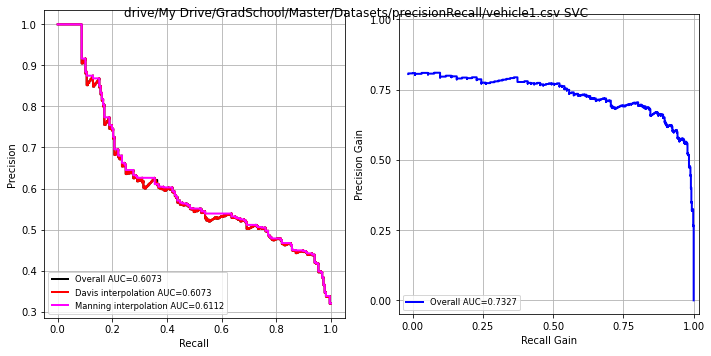

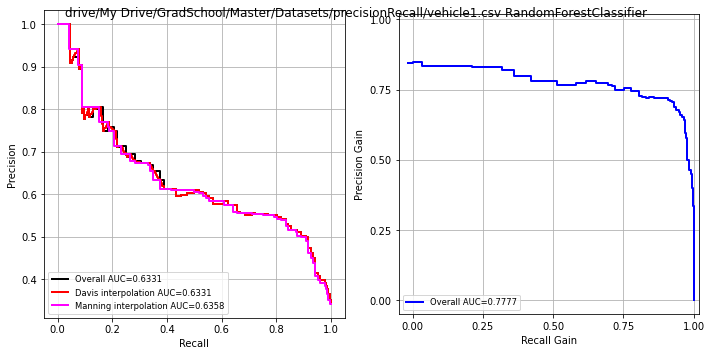

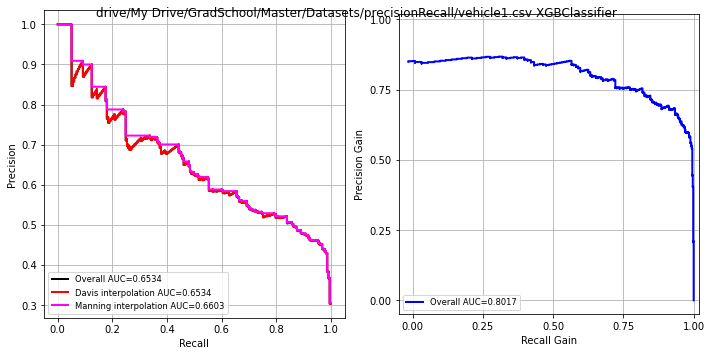

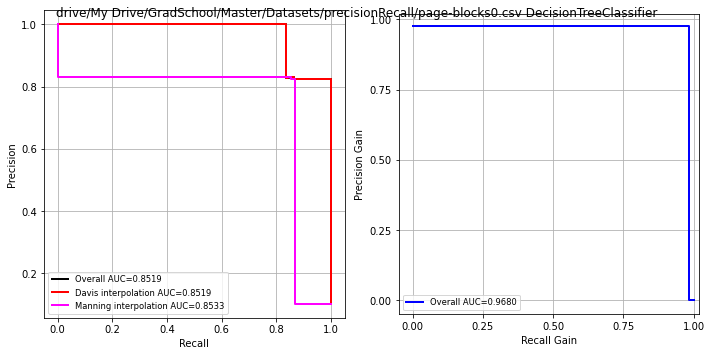

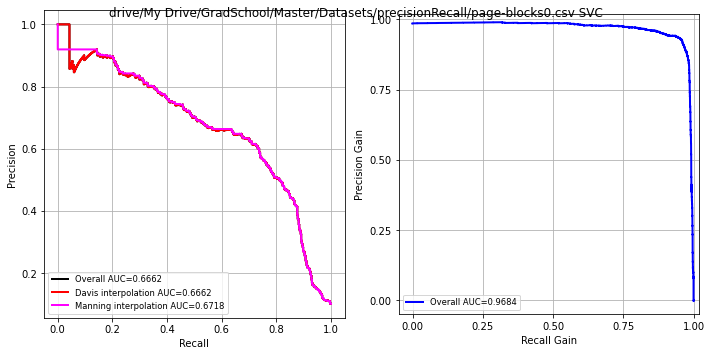

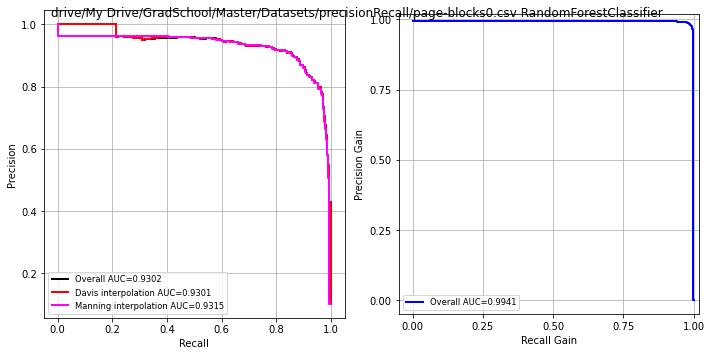

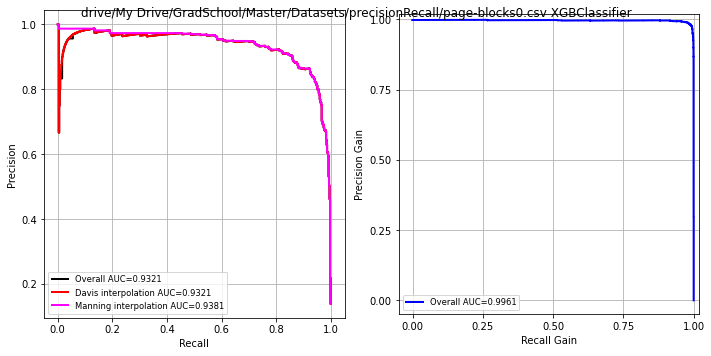

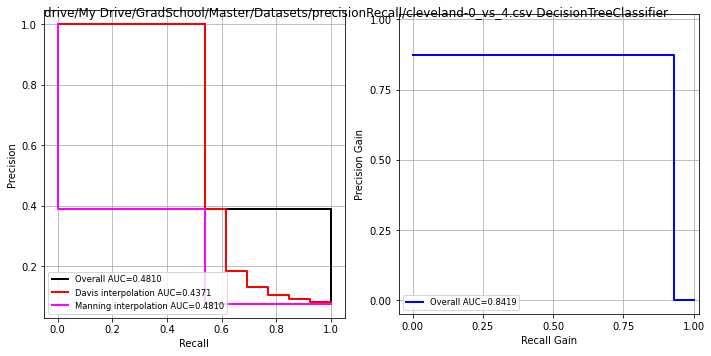

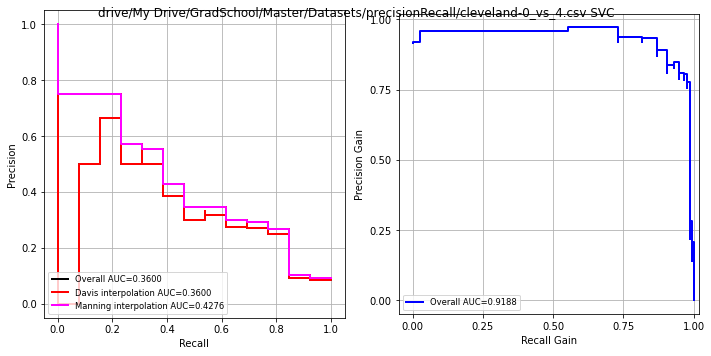

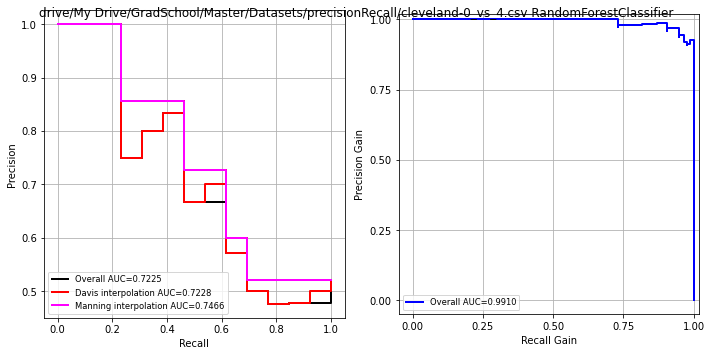

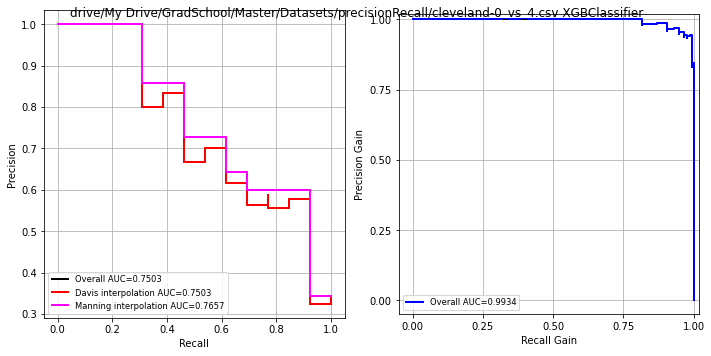

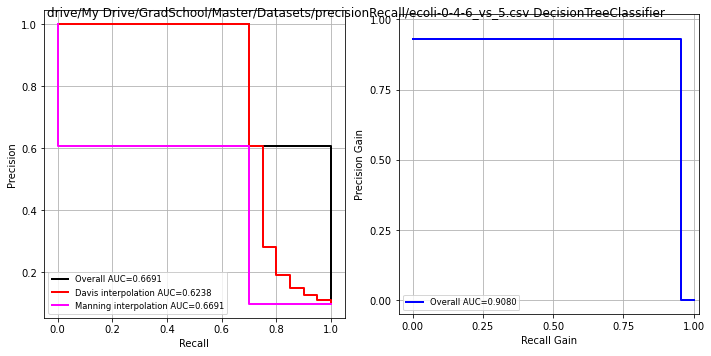

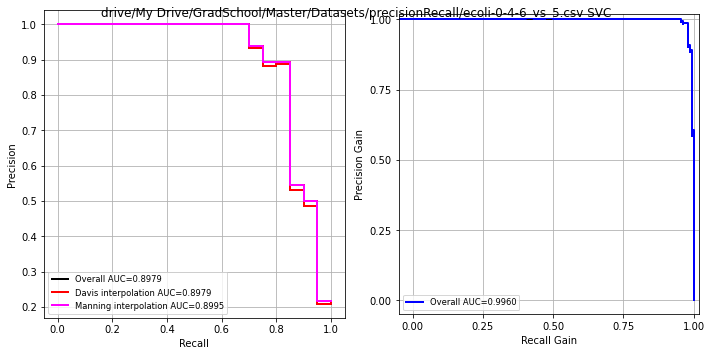

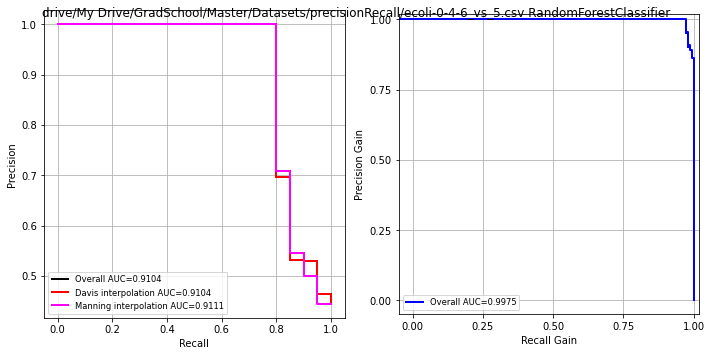

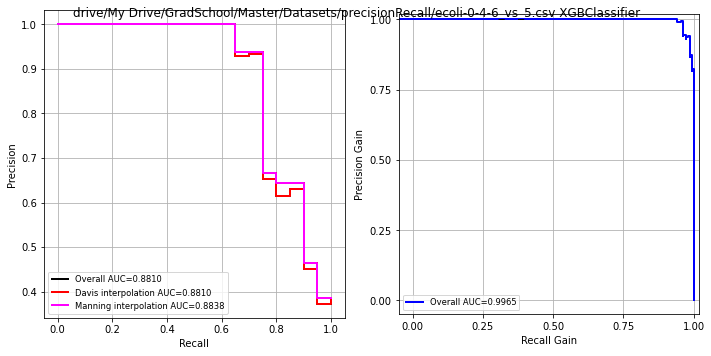

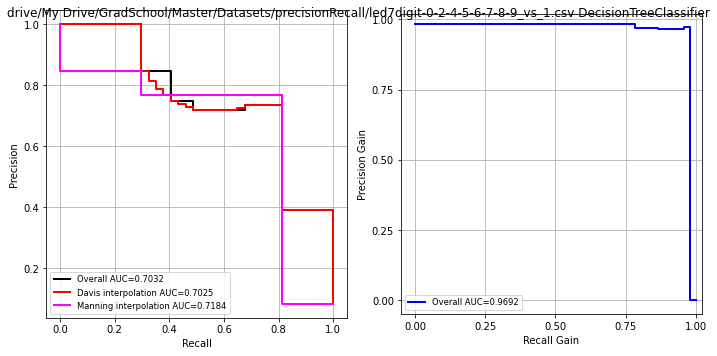

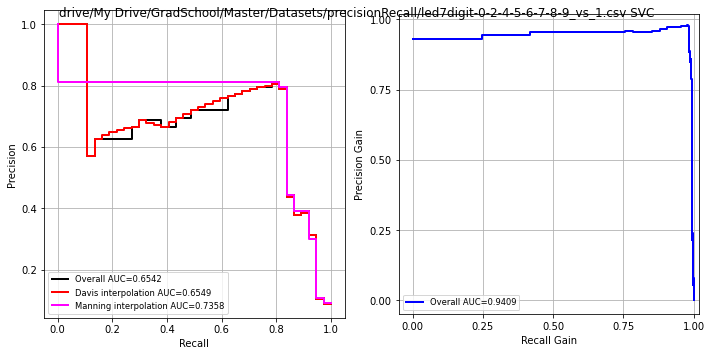

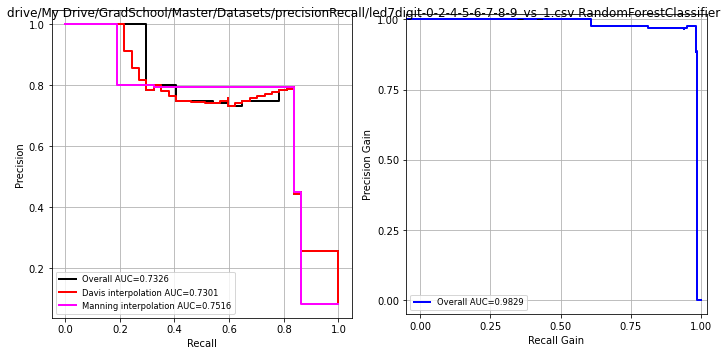

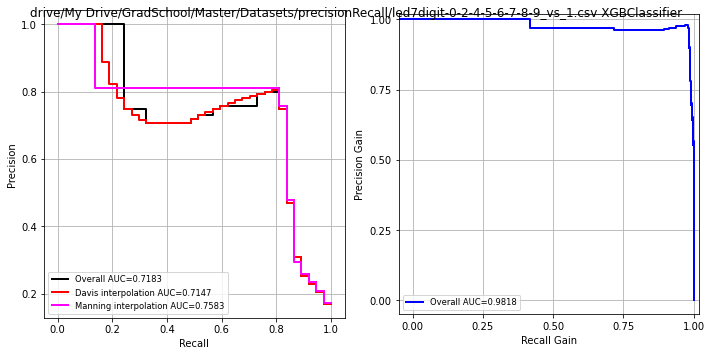

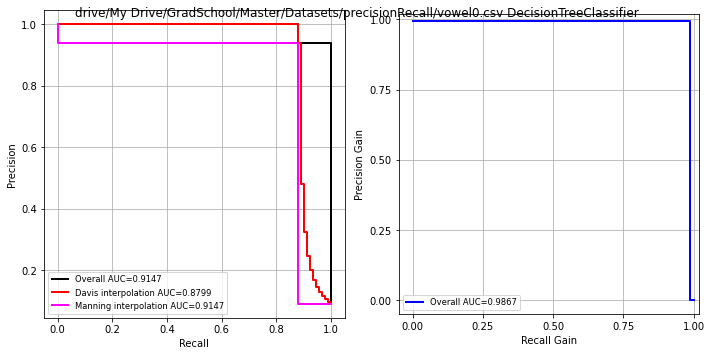

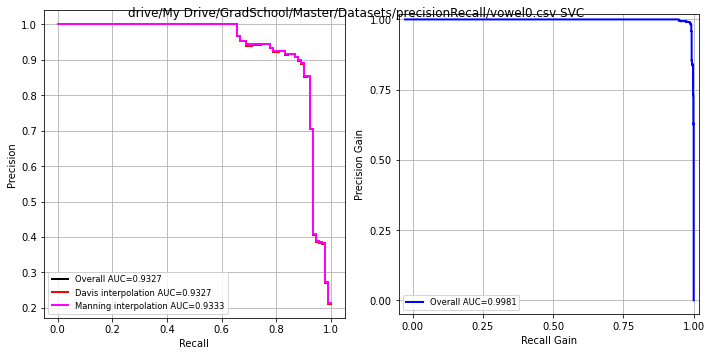

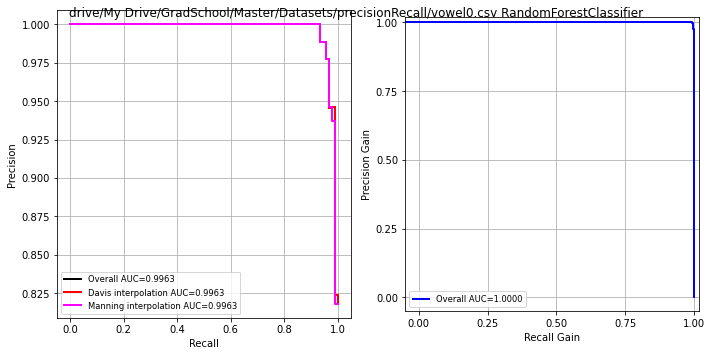

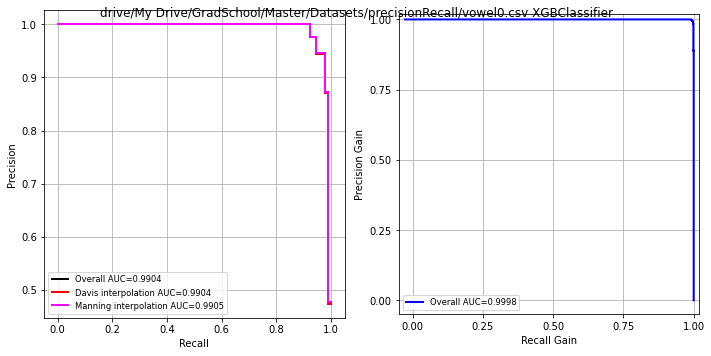

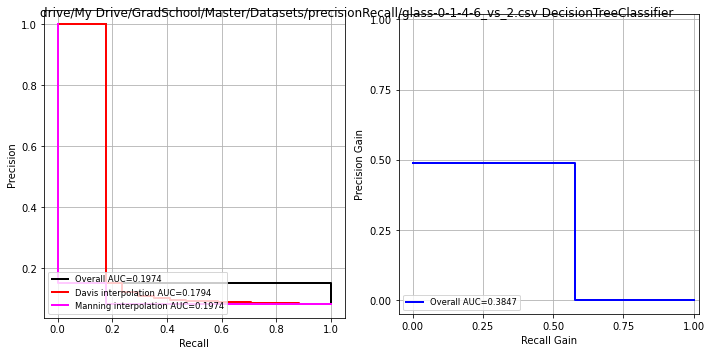

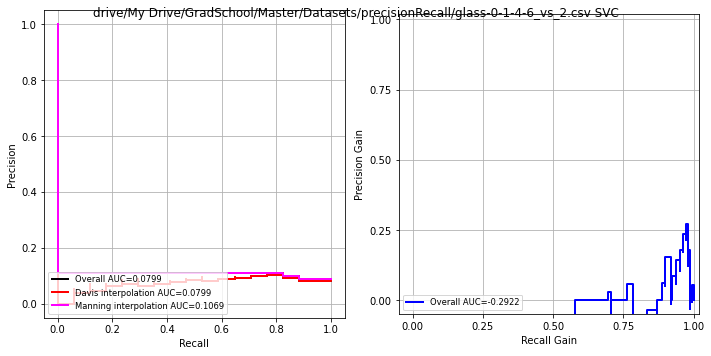

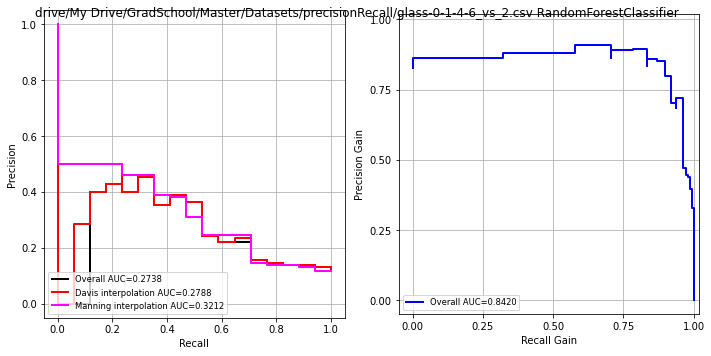

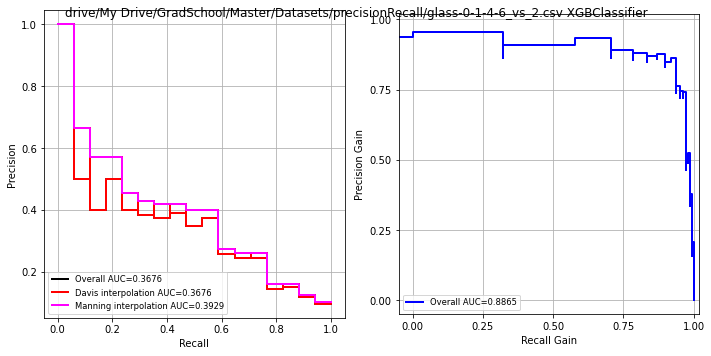

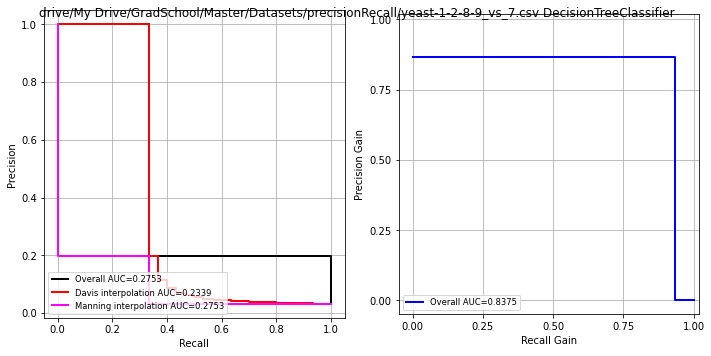

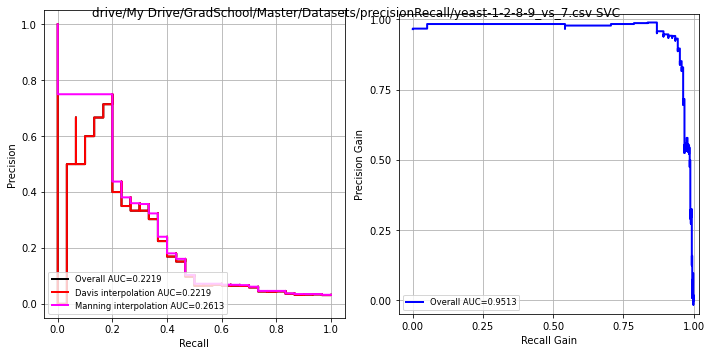

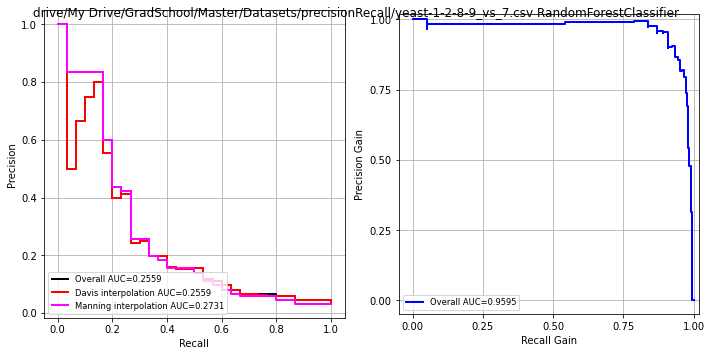

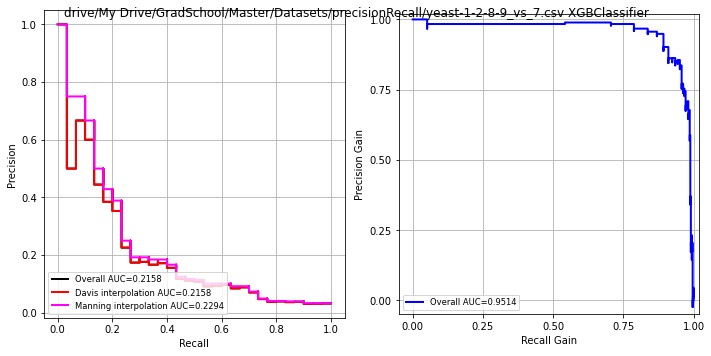

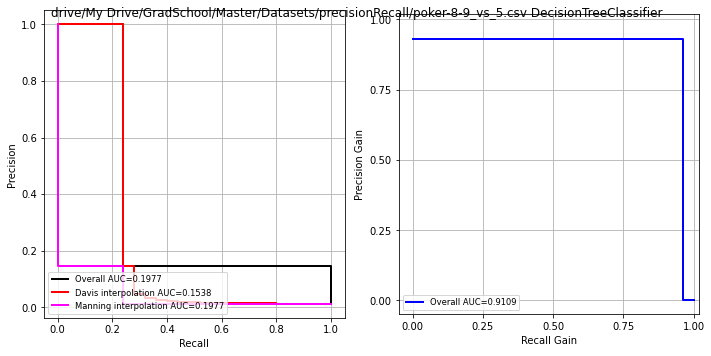

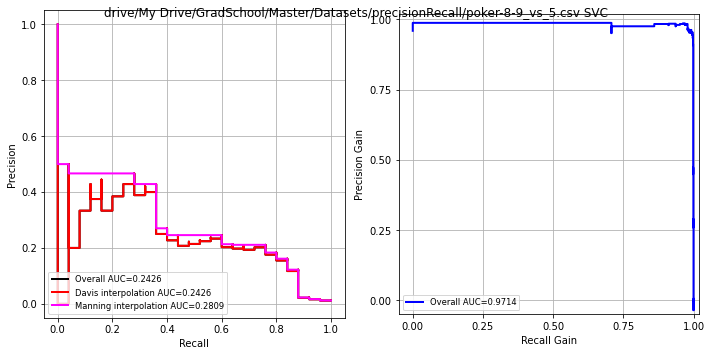

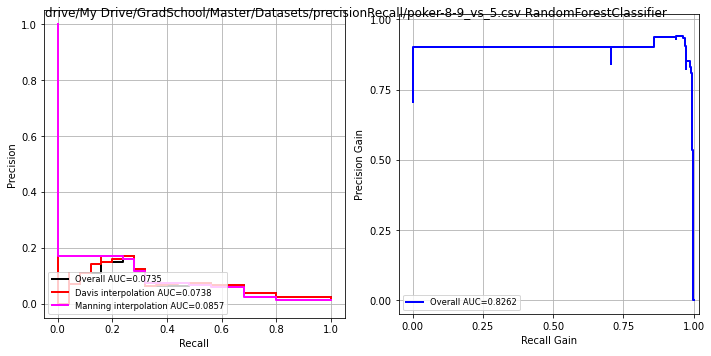

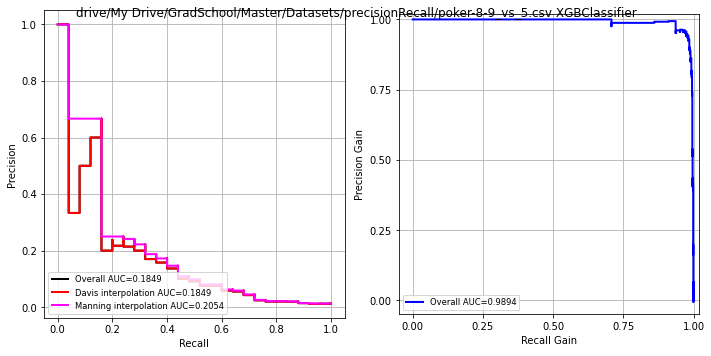

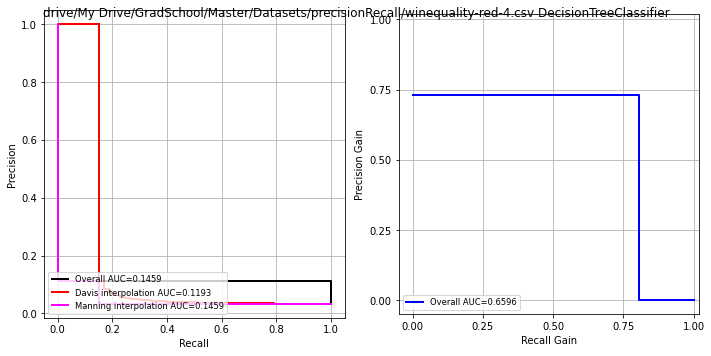

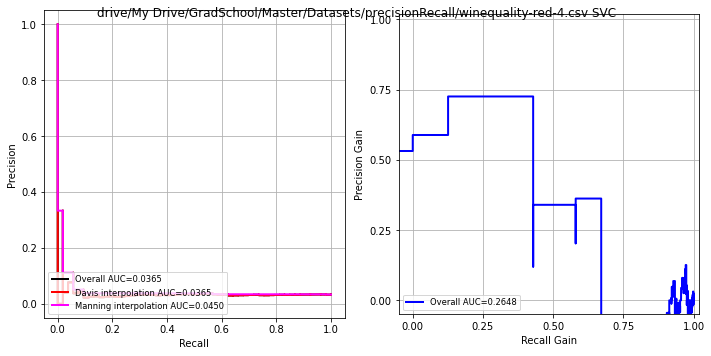

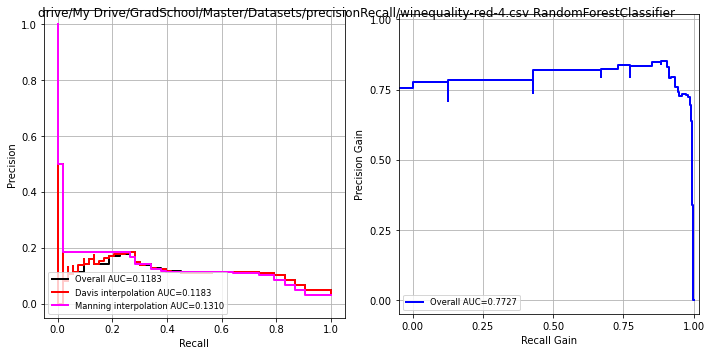

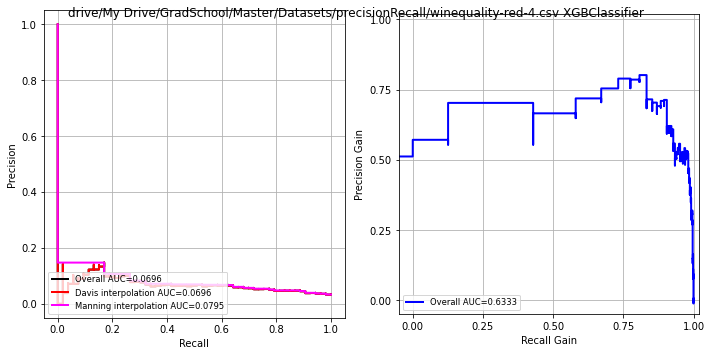

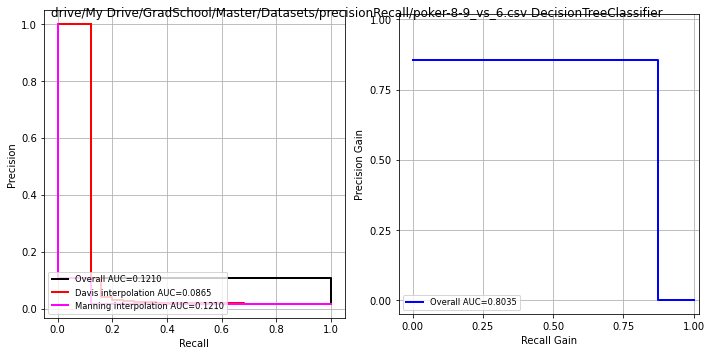

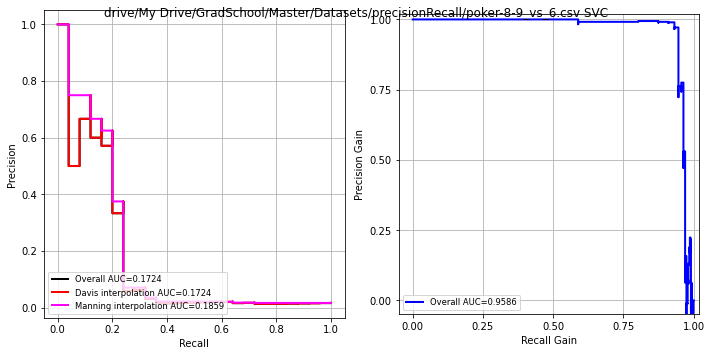

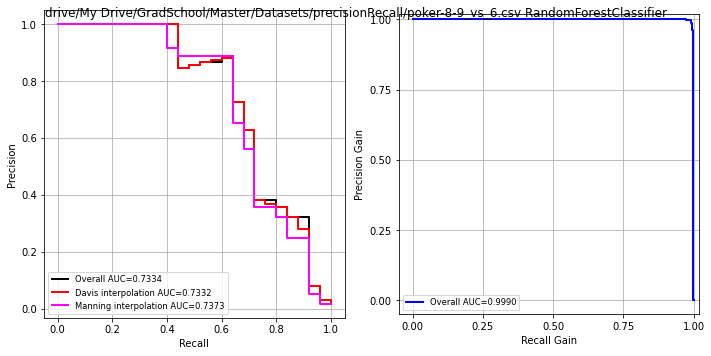

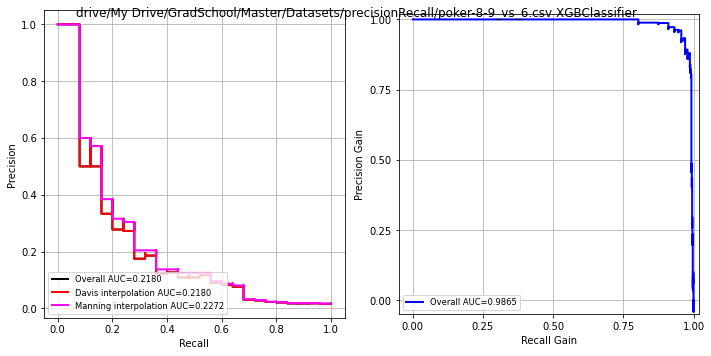

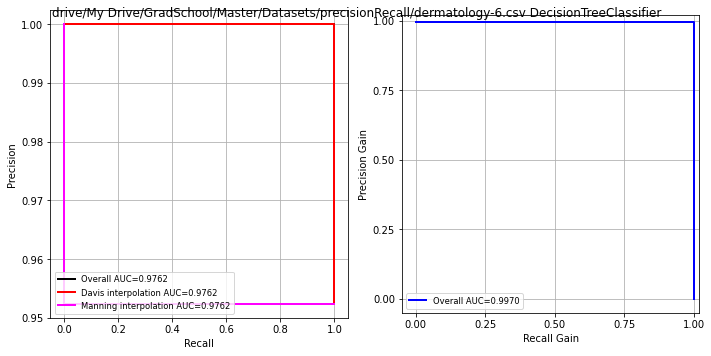

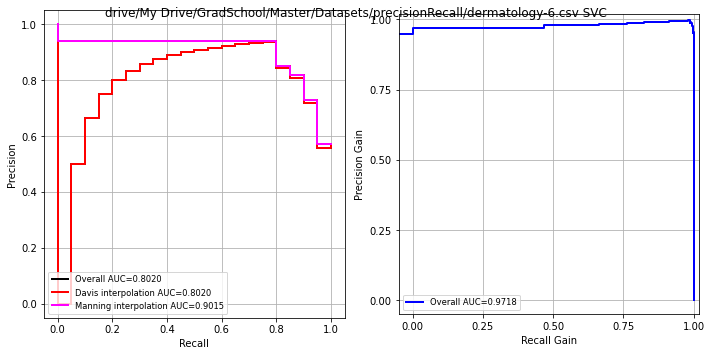

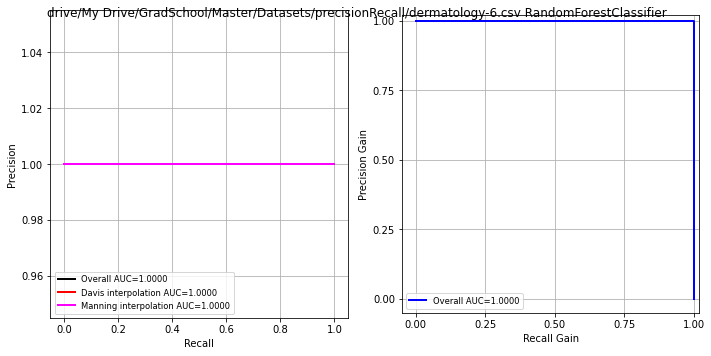

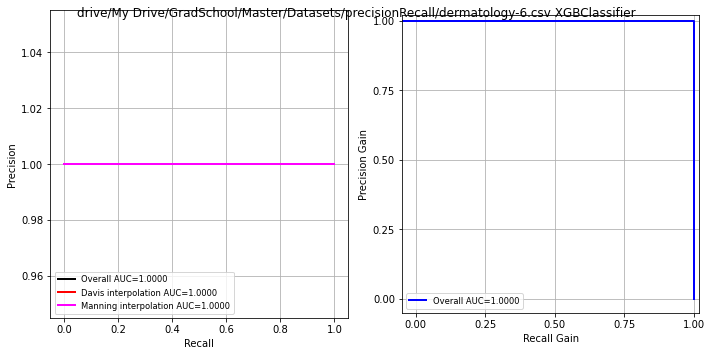

In [12]:
printGraph = True

scores = [[]]

#Classifiers
clf_dt = DecisionTreeClassifier(random_state=42)
clf_svm = svm.SVC(kernel="rbf", random_state=42, probability=True)
clf_rft = RandomForestClassifier(random_state=42)
clf_xgb = xgb.XGBClassifier()

#Running the experiments over all datasets
for i in range(numDatasets):
  print("Dataset:", filepaths[i])
  scores.append([])
  scores[i].append(crossValidate(cv_p=sk, cf_p=clf_dt, X_p=X[i], y_p=y_data[i], printGraph=printGraph, num=i))
  scores[i].append(crossValidate(cv_p=sk, cf_p=clf_svm, X_p=X[i], y_p=y_data[i], printGraph=printGraph, num=i))
  scores[i].append(crossValidate(cv_p=sk, cf_p=clf_rft, X_p=X[i], y_p=y_data[i], printGraph=printGraph, num=i))
  scores[i].append(crossValidate(cv_p=sk, cf_p=clf_xgb, X_p=X[i], y_p=y_data[i], printGraph=printGraph, num=i))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:498: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 


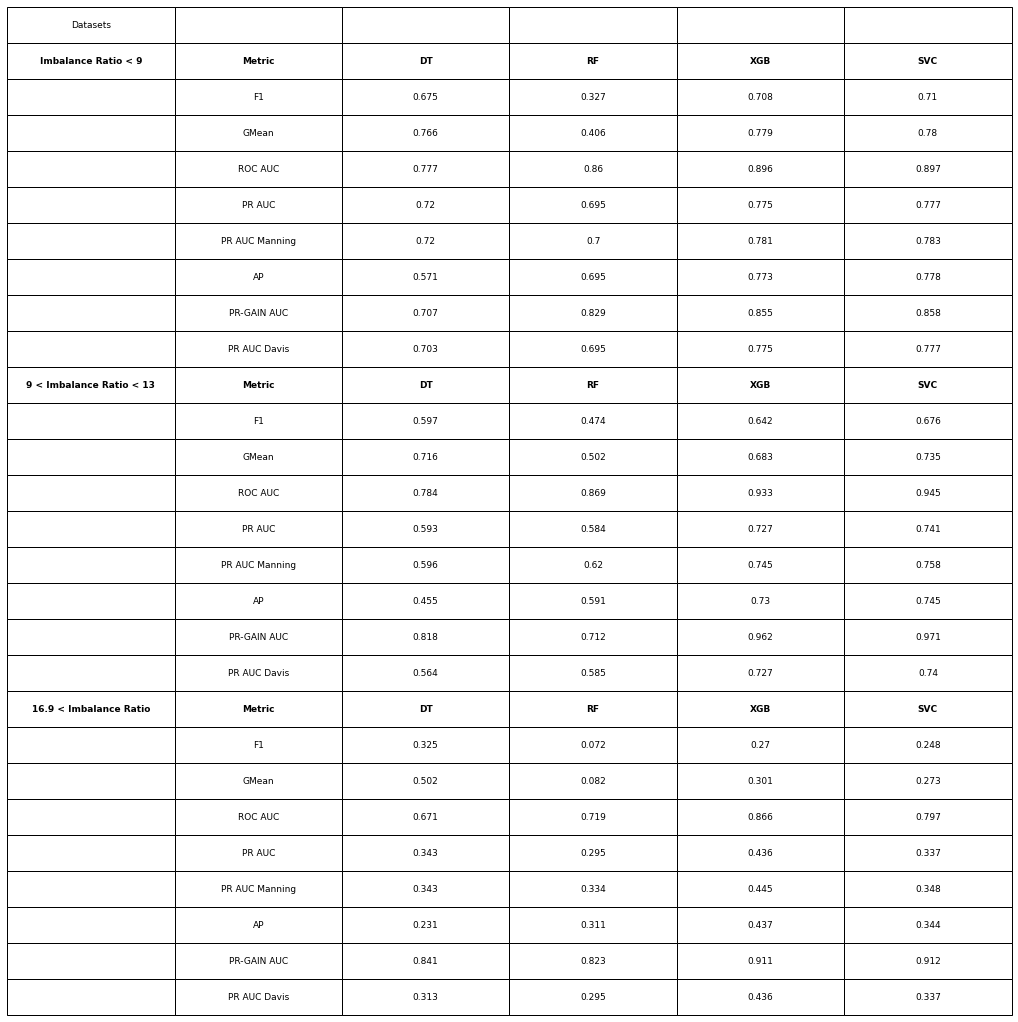

In [13]:
#Printing the results
printScoresAvg(scores)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:160: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 


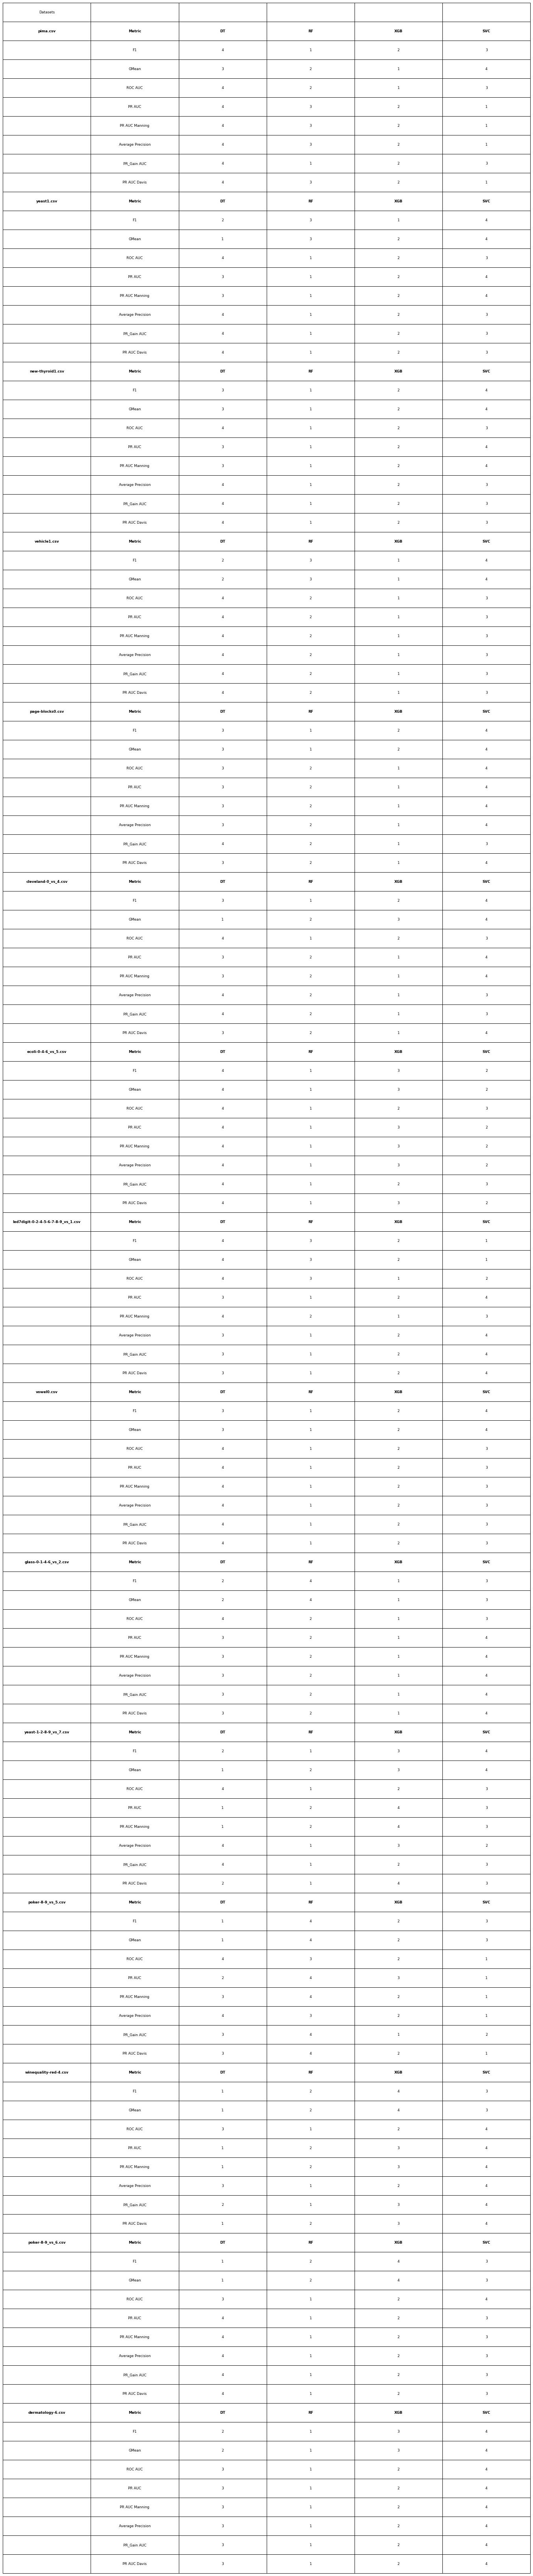

In [14]:
#Printing the ranks of all metrics
ranks = rankScores(scores)
printRanks(ranks)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:317: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 


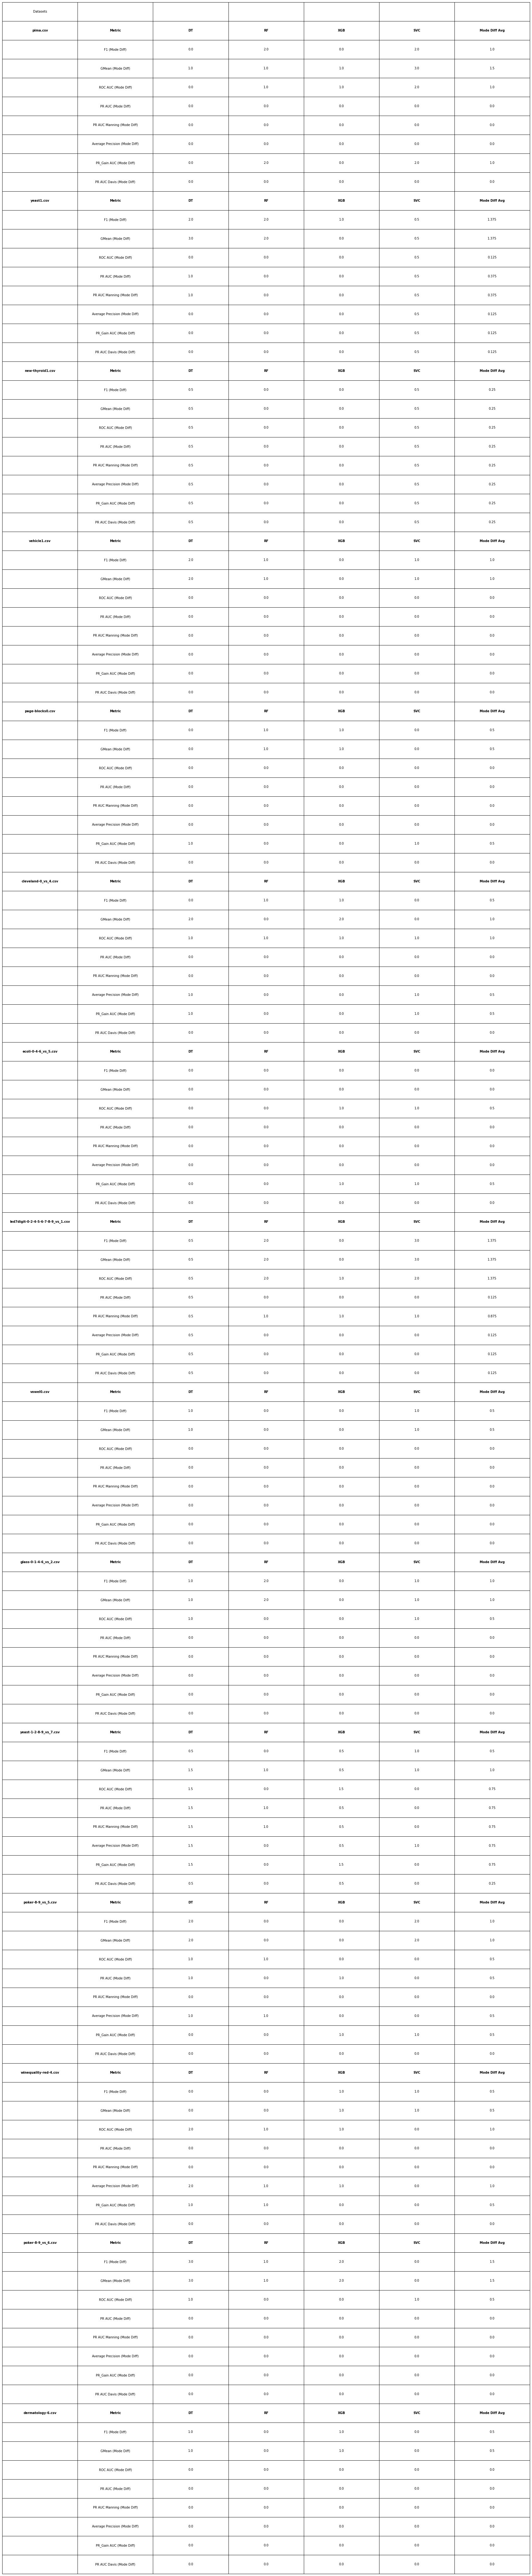

In [15]:
#Printing the mode difference of all metrics
modes, new_metrics = printMode(ranks, allData=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:364: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 


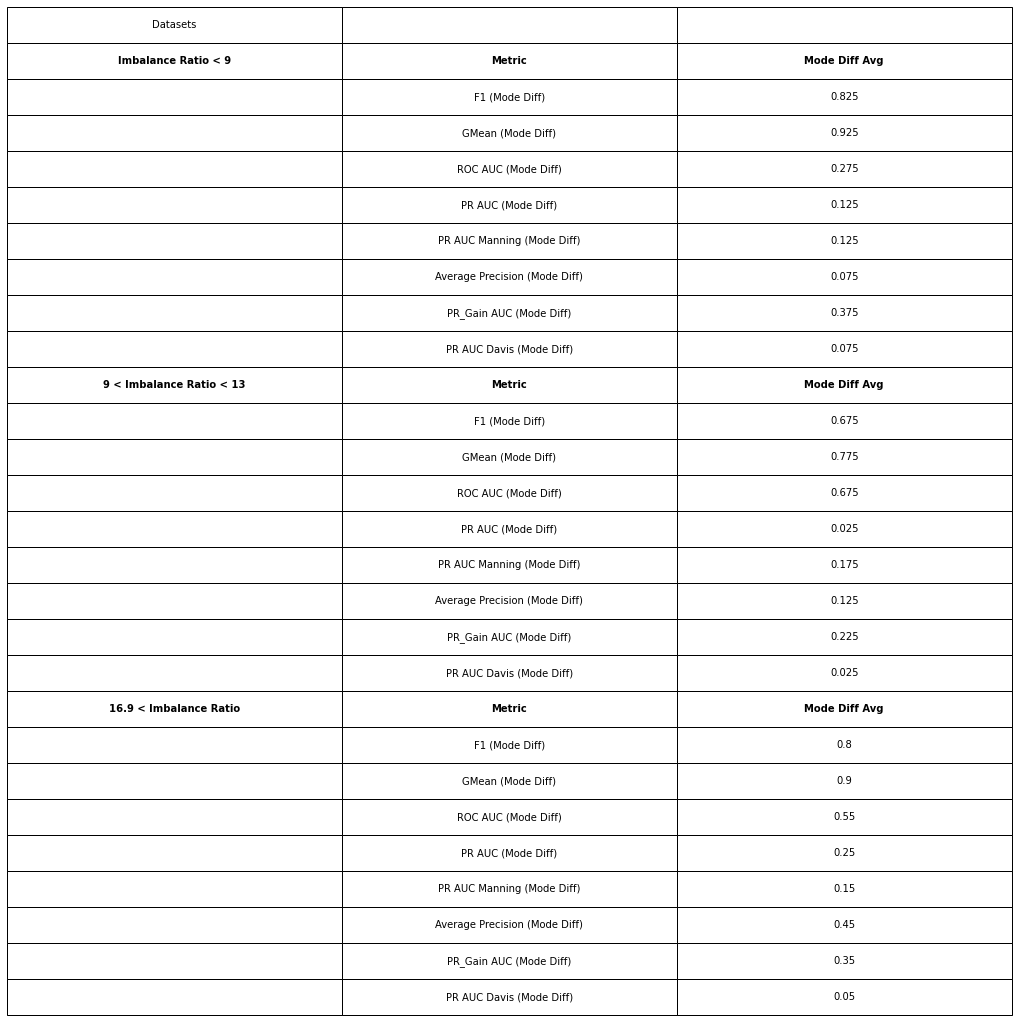

In [16]:
#Averaging the mode difference over imbalance ratios
printModeAvg(modes,new_metrics)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:423: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 


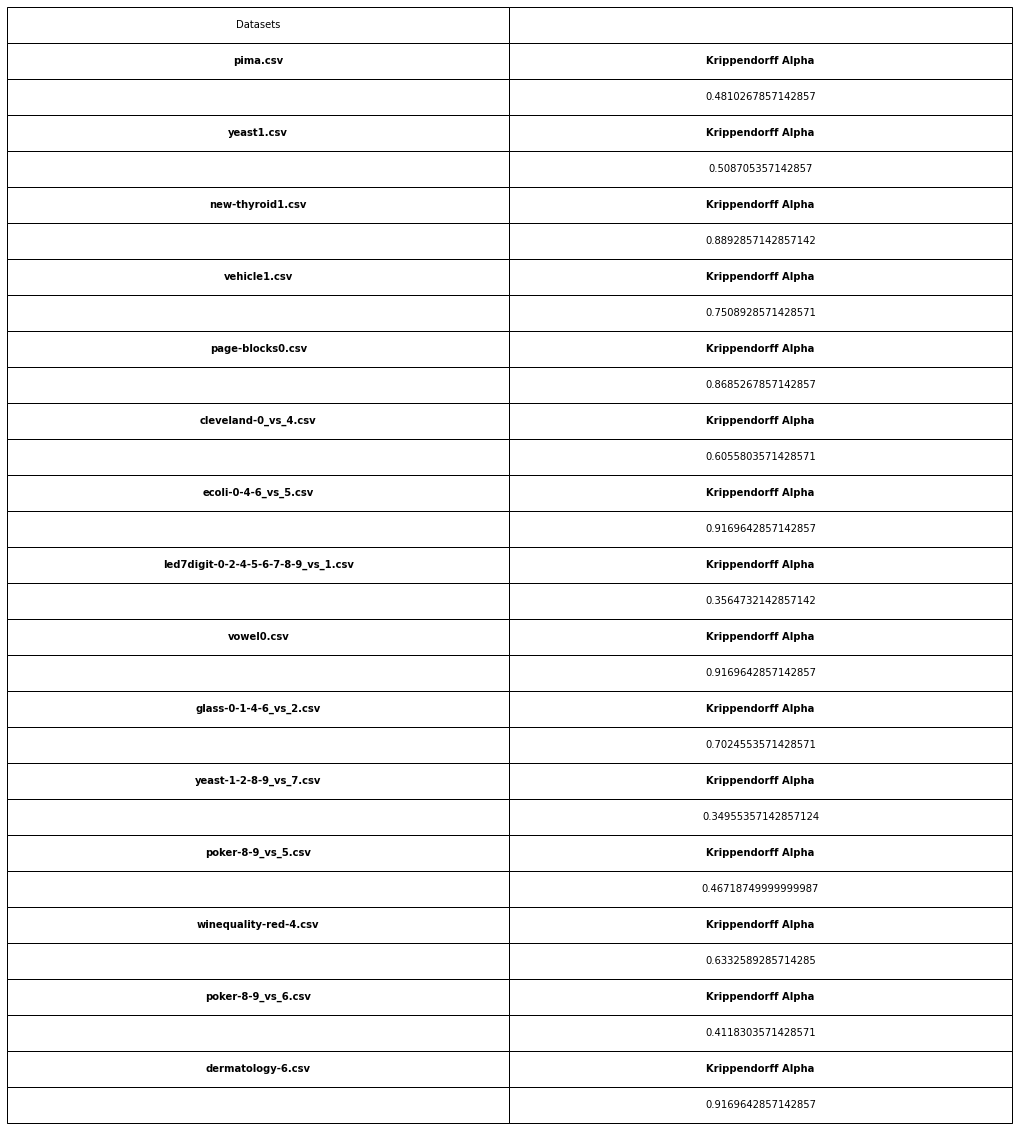

In [21]:
#Printing the Krippendorff's Alpha
printKrippendorff(ranks, ['F1','GMean','ROCAUC','PRAUC','PRAUCManning','AP','PRGAINAUC','PRAUCDavis'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:317: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 


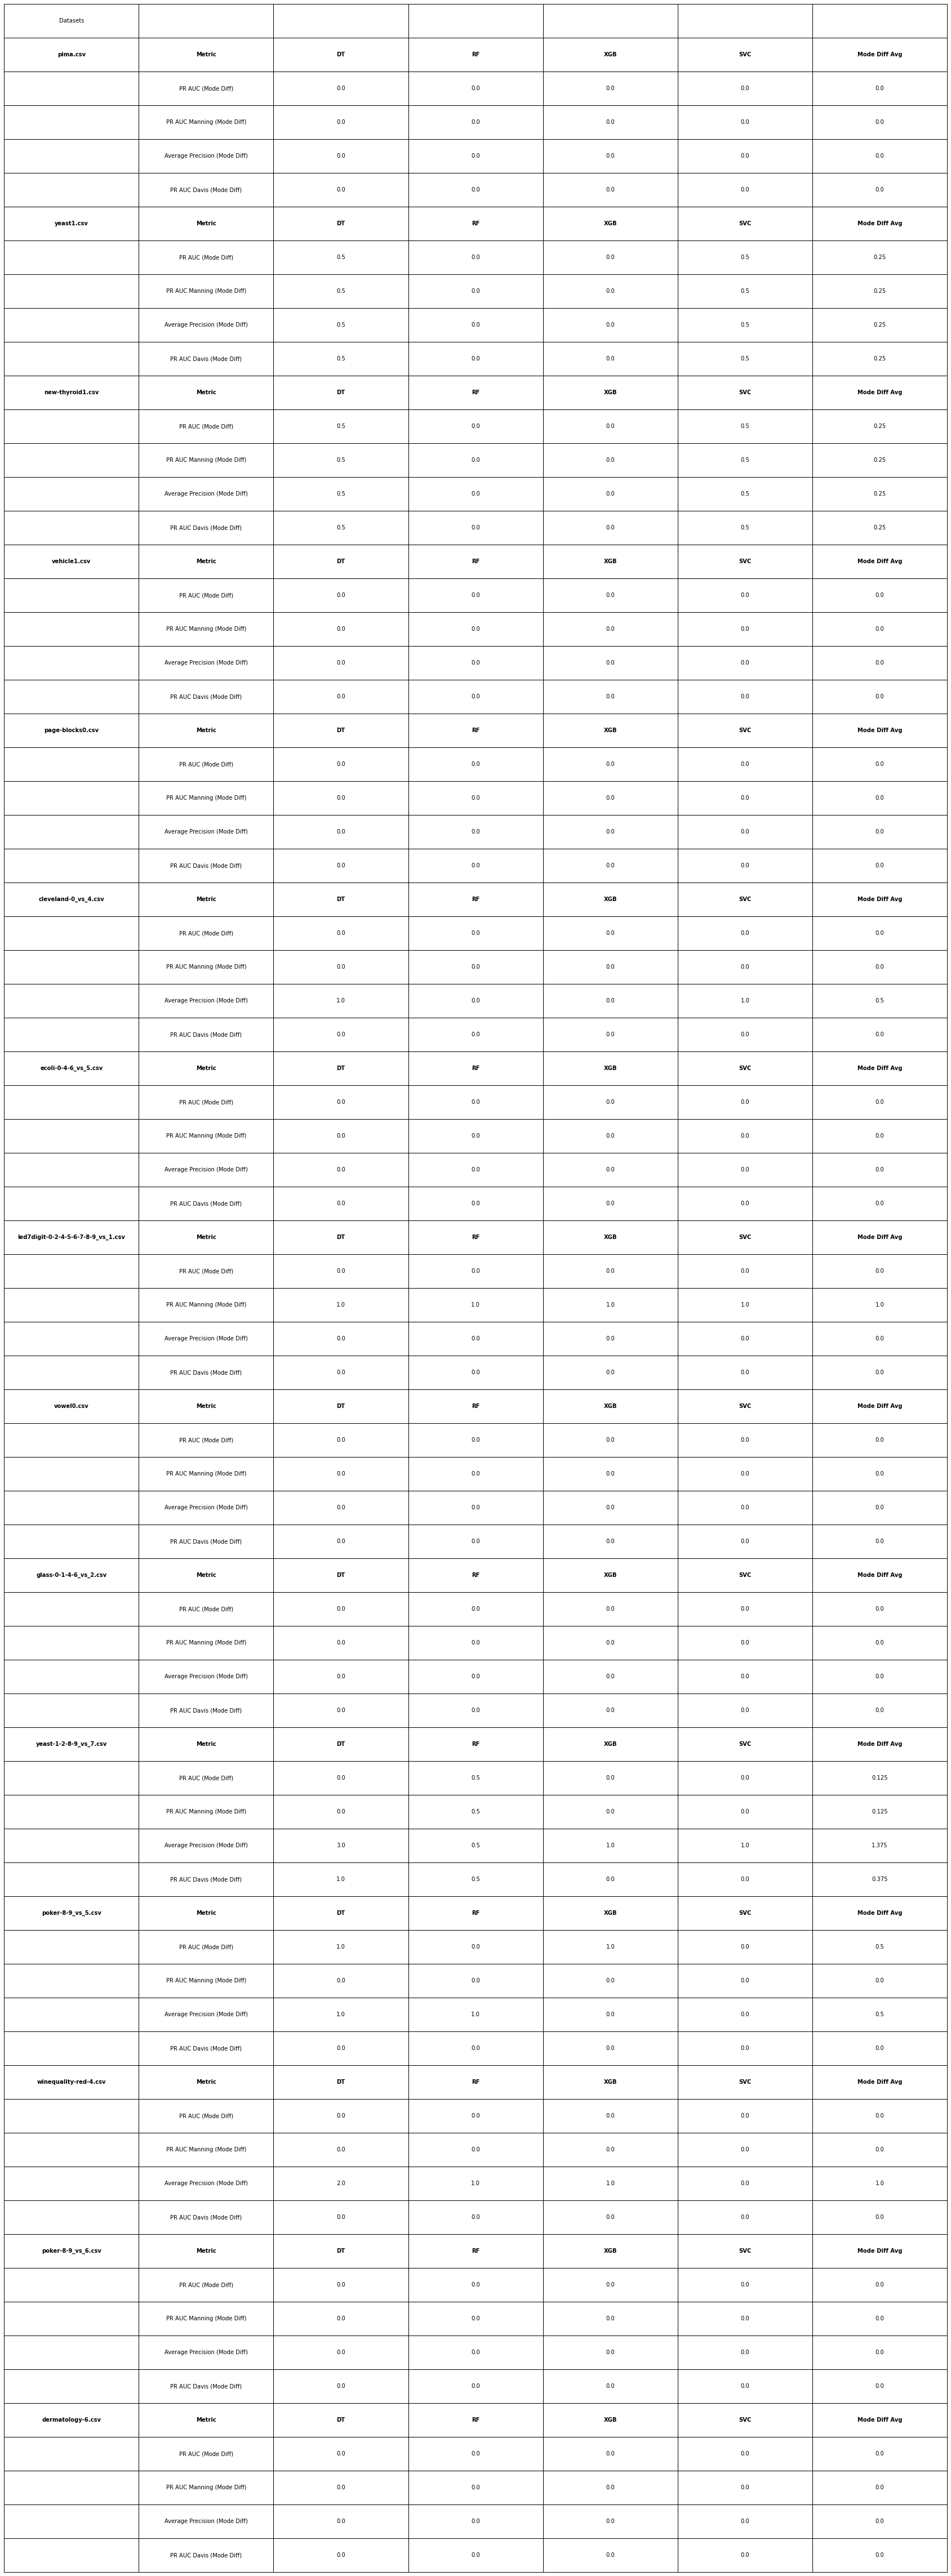

In [18]:
#Computing and printing the mode difference over only the difference interpretations of the PR Curve
modes, new_metrics = printMode(ranks, allData=True, metrics=['PRAUC','PRAUCManning','PRAUCDavis','AP'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:364: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 


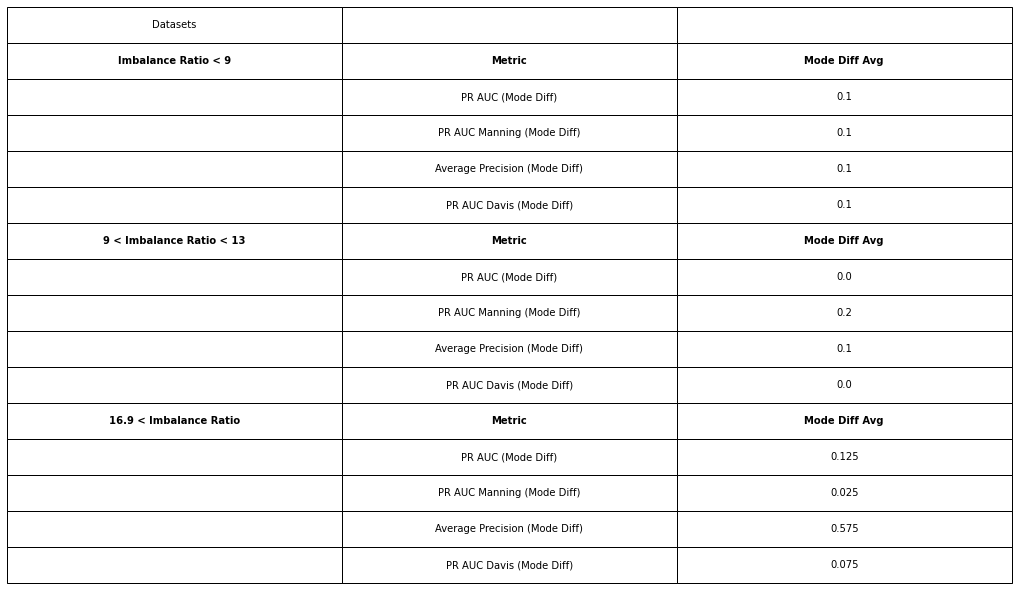

In [19]:
#Averaging the mode difference over imbalance ratios
printModeAvg(modes,new_metrics)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:423: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 


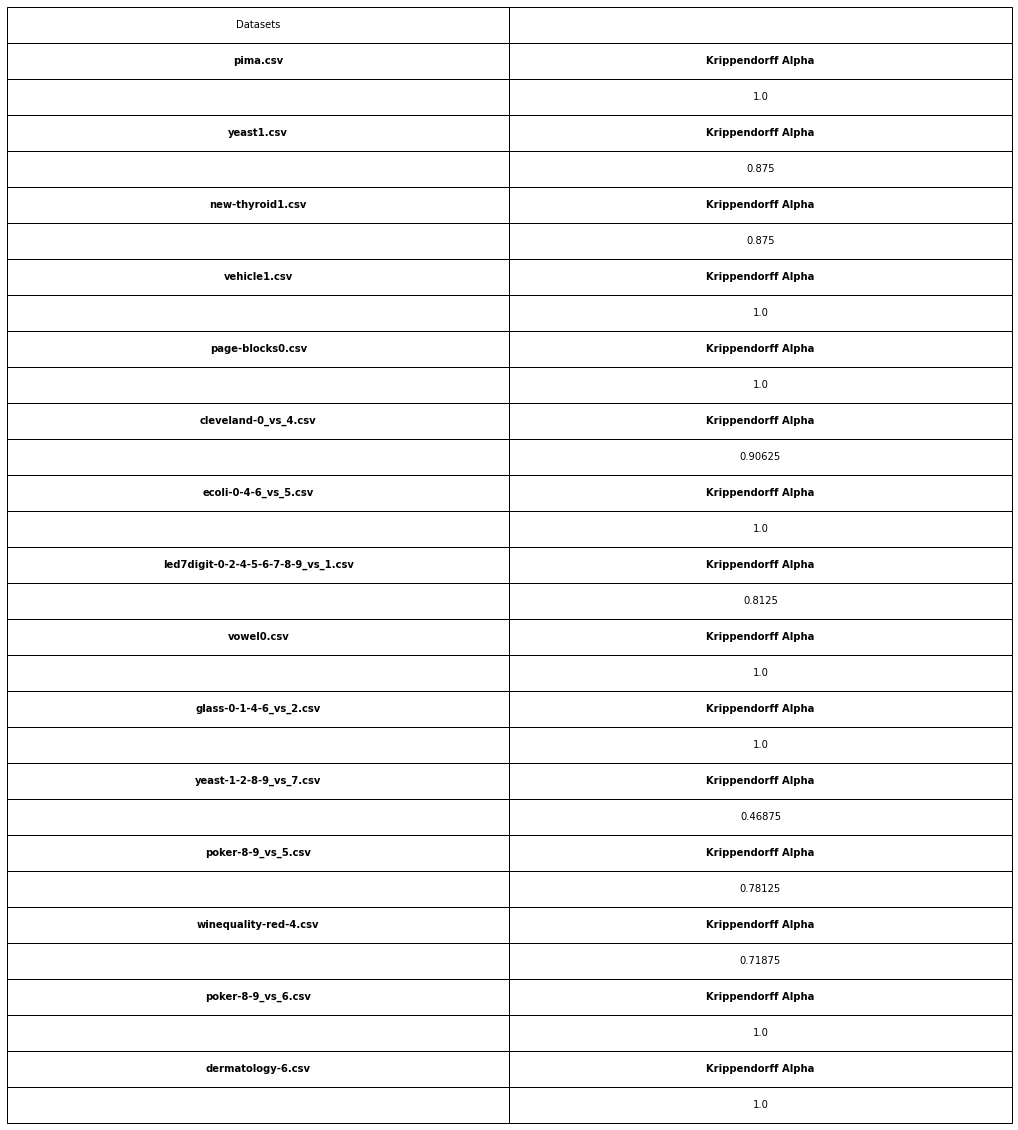

In [20]:
#Printing the Krippendorff's Alpha
printKrippendorff(ranks, ['PRAUC','PRAUCManning','PRAUCDavis','AP'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:317: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 


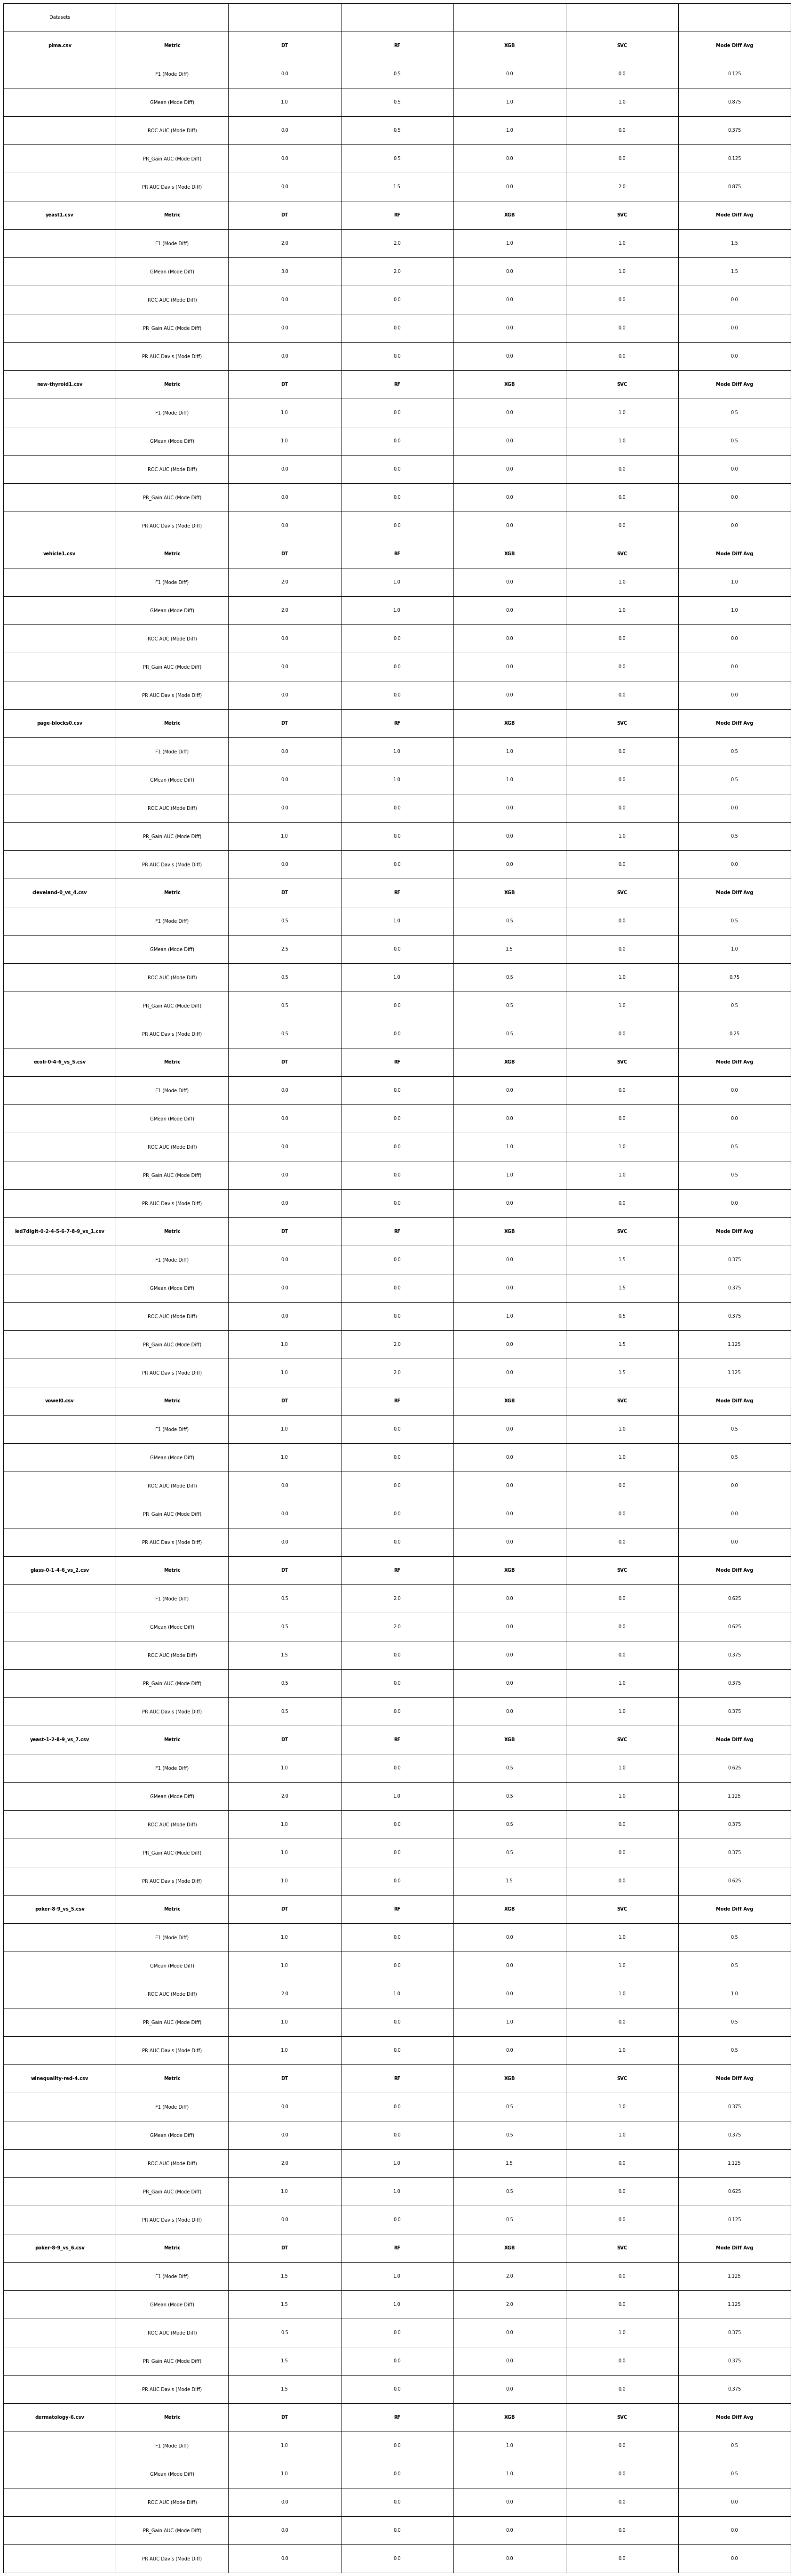

In [22]:
#Computing and printing the mode difference over the best performing PR interpolation and other metrics
modes, new_metrics = printMode(ranks, allData=True, metrics=['F1','GMean','ROCAUC','PRAUCDavis','PRGAINAUC'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:364: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 


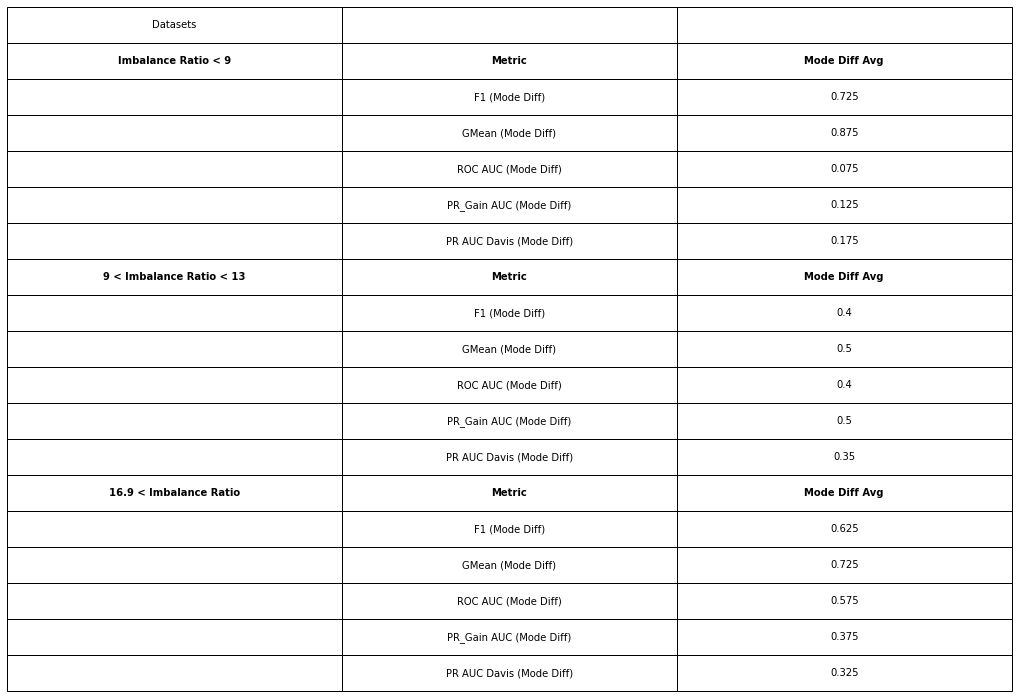

In [23]:
#Averaging the mode differences over the imbalance ratios
printModeAvg(modes,new_metrics)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:423: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 


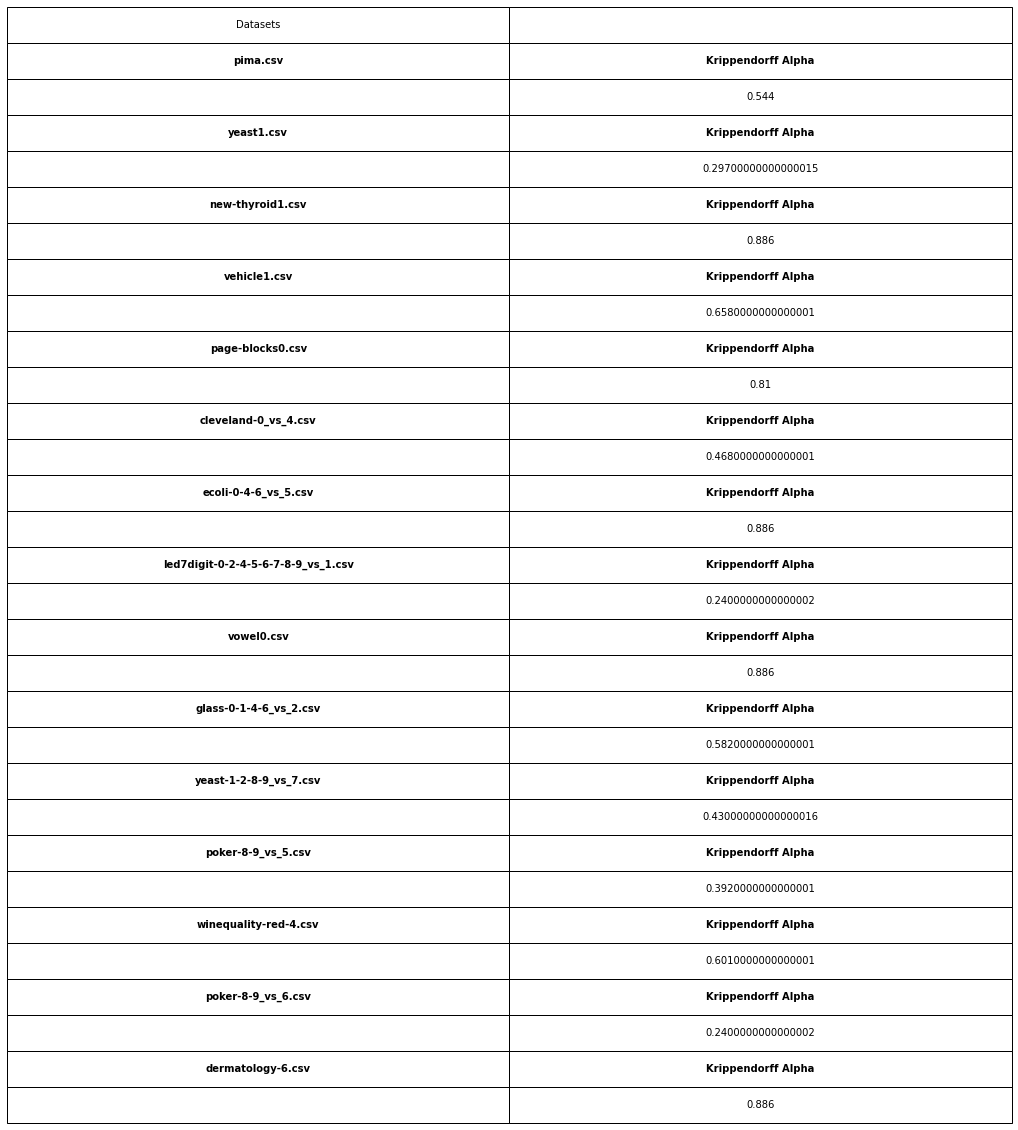

In [24]:
#Printing the Krippendorff's Alpha
printKrippendorff(ranks, ['F1','GMean','ROCAUC','PRAUCDavis','PRGAINAUC'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:317: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 


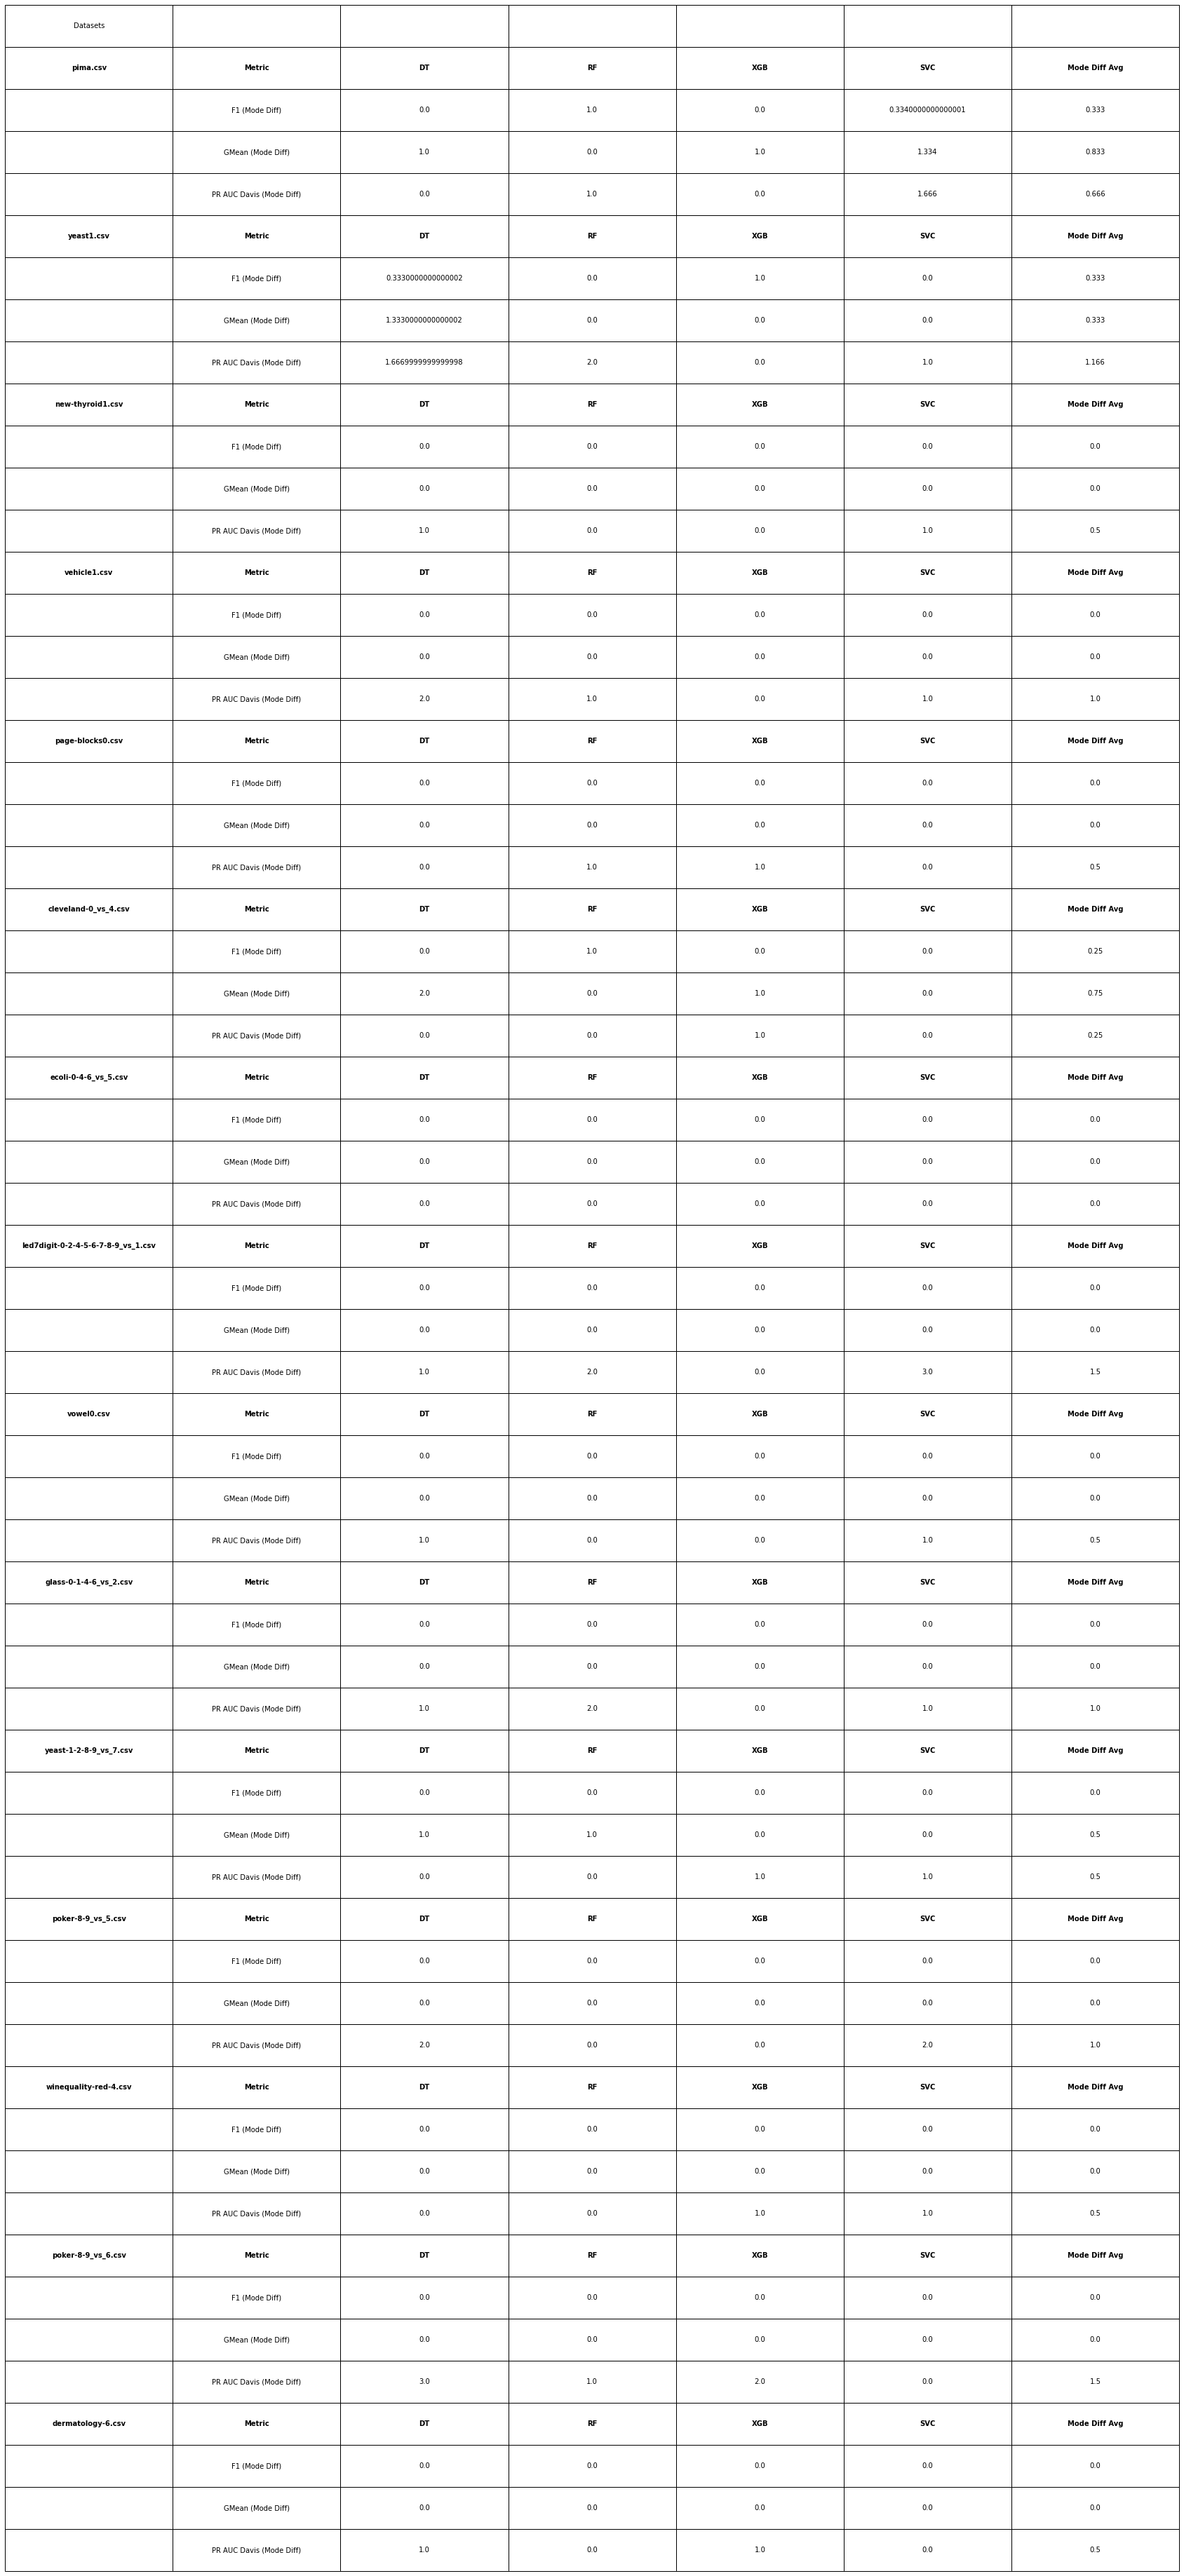

In [25]:
#Computing and printing the mode difference over only F1, G-Mean and PR AUC Davis to test the disparity between ranked and threshold metrics
modes, new_metrics = printMode(ranks, allData=True, metrics=['F1','GMean','PRAUCDavis'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:364: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 


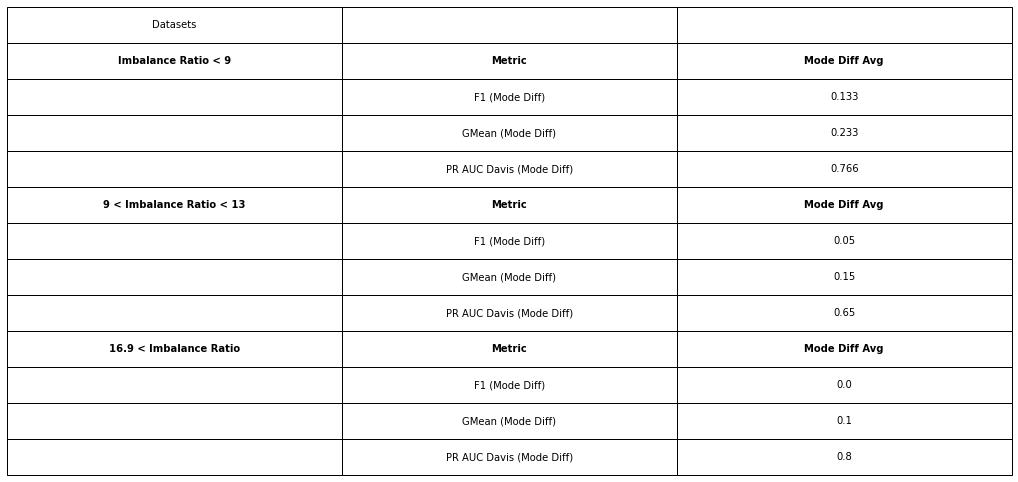

In [26]:
#Averaging the mode differences over the imbalance ratios
printModeAvg(modes,new_metrics)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:317: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 


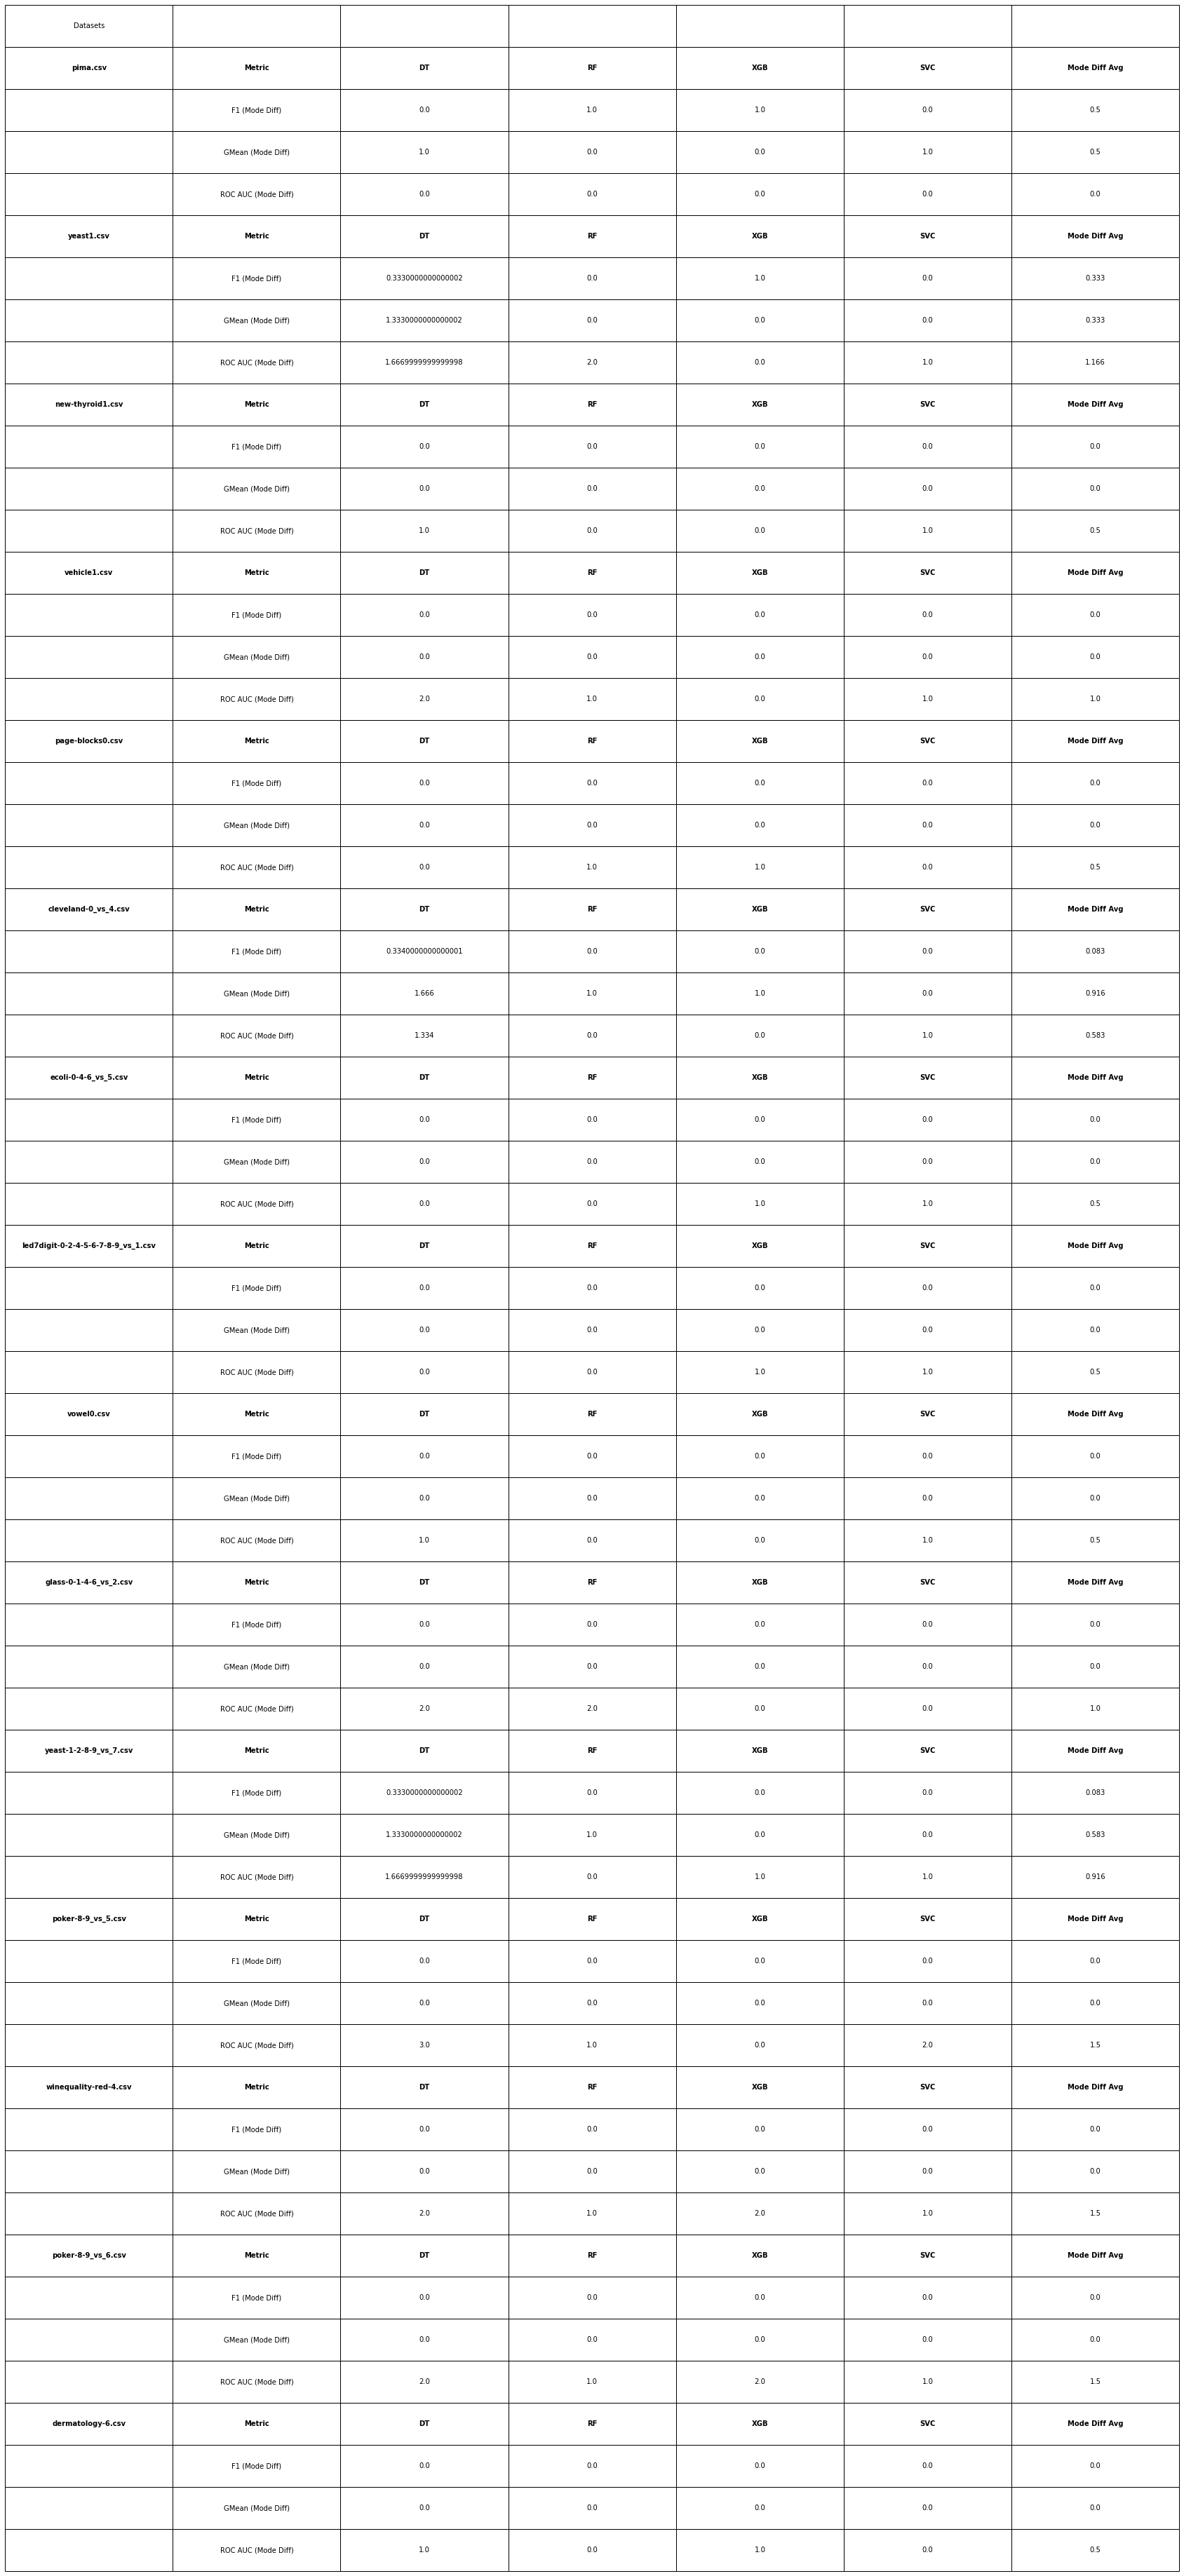

In [27]:
#Computing and printing the mode difference over only F1, G-Mean and ROC AUC to test the disparity between ranked and threshold metrics
modes, new_metrics = printMode(ranks, allData=True, metrics=['F1','GMean','ROCAUC'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:364: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 


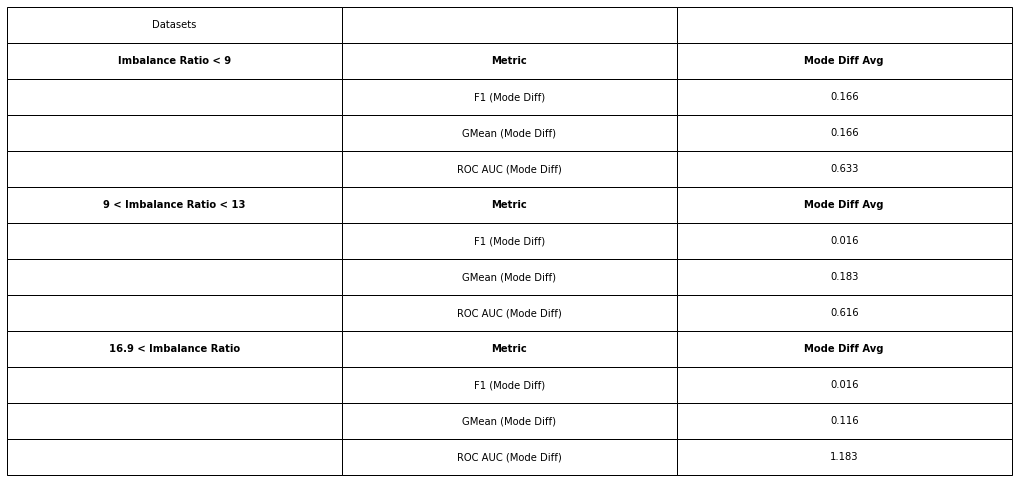

In [28]:
#Averaging the mode differences over the imbalance ratios
printModeAvg(modes,new_metrics)